<a href="https://colab.research.google.com/github/NayeonKimdev/math-for-ml/blob/main/01_linear_algebra/03_eigendecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EIGENDECOMPOSITION: THE MATHEMATICAL FOUNDATION OF MODERN AI

# 🎯 Eigendecomposition for Machine Learning

**Why This Matters for AI Video Engineers:**
- **PCA (Principal Component Analysis)**: Core of video compression algorithms
- **Face Recognition**: Eigenfaces were the foundation of early computer vision
- **Neural Networks**: Understanding weight matrix properties and stability
- **Computer Graphics**: 3D transformations and animation systems
- **Signal Processing**: Frequency domain analysis for video processing

**Industry Applications:**
- Netflix/YouTube: Video compression using PCA-based techniques
- Tesla/Waymo: Computer vision for autonomous driving
- Meta/Google: Real-time video processing and AR filters
- NVIDIA: GPU optimization for matrix operations

**Learning Objectives:**
1. Master eigenvalues and eigenvectors conceptually
2. Implement eigendecomposition from scratch
3. Apply to real computer vision problems
4. Understand computational complexity for production systems

**🚀 Quick Start Guide:**
- Run each cell sequentially
- Modify parameters to build intuition  
- Focus on visual interpretations
- Connect math to real-world applications

In [1]:
# Install required packages for interactive learning
!pip install numpy matplotlib plotly pandas scikit-learn opencv-python-headless seaborn -q

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from sklearn.datasets import fetch_lfw_people, make_classification
from sklearn.decomposition import PCA
import cv2
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
np.random.seed(42)

print("🎉 Environment ready! Let's explore eigendecomposition...")
print("💡 This notebook will teach you the math behind PCA, face recognition, and more!")


🎉 Environment ready! Let's explore eigendecomposition...
💡 This notebook will teach you the math behind PCA, face recognition, and more!


# CONCEPT: EIGENVALUES AND EIGENVECTORS INTUITION

## 🧠 Intuitive Understanding

**Think of a matrix as a transformation:**
- It stretches, rotates, or reflects vectors in space
- **Eigenvectors**: Special directions that only get scaled (not rotated)
- **Eigenvalues**: How much stretching happens in each eigenvector direction

**Real-World Analogy:**
Imagine stretching a rubber sheet:
- Some directions stretch more than others
- Eigenvectors = the principal stretching directions  
- Eigenvalues = how much stretching in each direction

**Why This Matters in AI:**
- **Data has natural directions of variation**
- **Neural networks learn these directions**
- **Compression finds the most important directions**
- **Stability analysis uses eigenvalue magnitudes**

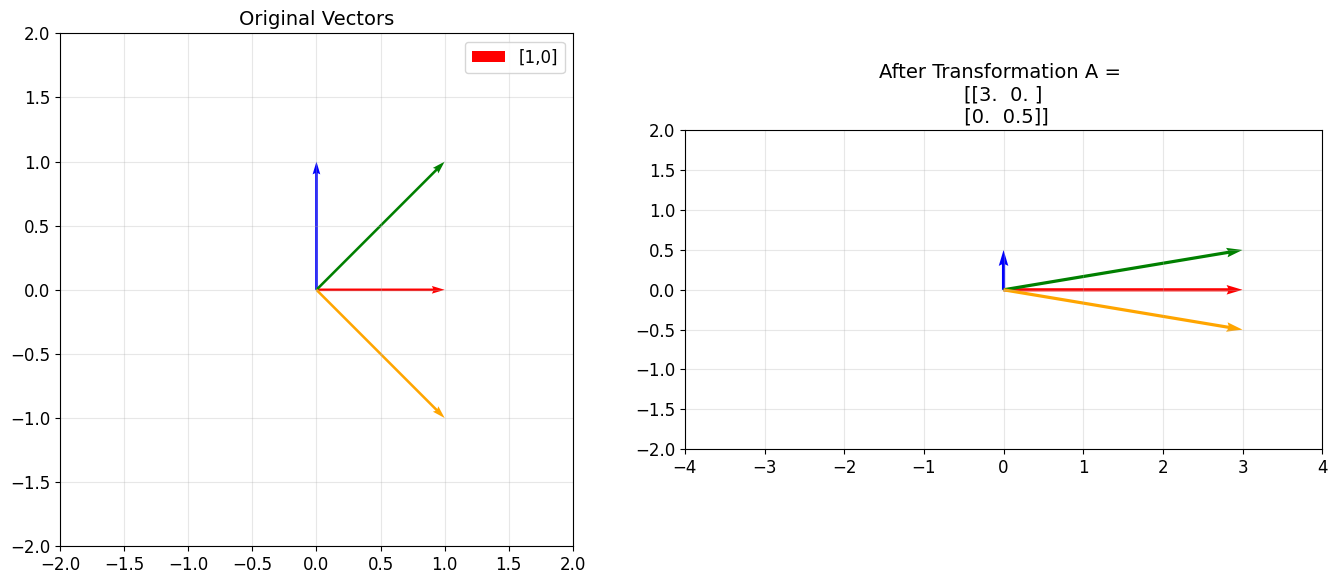

🔍 Notice how [1,0] only gets scaled (eigenvalue = 3)
🔍 Notice how [0,1] only gets scaled (eigenvalue = 0.5)
🔍 Other vectors get both scaled AND rotated!


In [2]:
# Simple 2D example to build intuition
def create_simple_transformation():
    """Create a simple 2D transformation matrix"""
    # Matrix that stretches along x-axis and shrinks along y-axis
    A = np.array([[3, 0],
                  [0, 0.5]])

    # Original vectors to transform
    vectors = np.array([[1, 0], [0, 1], [1, 1], [1, -1]]).T
    transformed = A @ vectors

    return A, vectors, transformed

# Visualize the transformation
A, original_vectors, transformed_vectors = create_simple_transformation()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original vectors
ax1.quiver([0]*4, [0]*4, original_vectors[0], original_vectors[1],
           angles='xy', scale_units='xy', scale=1, color=['red', 'blue', 'green', 'orange'], width=0.005)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.set_title('Original Vectors', fontsize=14)
ax1.legend(['[1,0]', '[0,1]', '[1,1]', '[1,-1]'], loc='upper right')

# Transformed vectors
ax2.quiver([0]*4, [0]*4, transformed_vectors[0], transformed_vectors[1],
           angles='xy', scale_units='xy', scale=1, color=['red', 'blue', 'green', 'orange'], width=0.005)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-2, 2)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.set_title(f'After Transformation A = \n{A}', fontsize=14)

plt.tight_layout()
plt.show()

print("🔍 Notice how [1,0] only gets scaled (eigenvalue = 3)")
print("🔍 Notice how [0,1] only gets scaled (eigenvalue = 0.5)")
print("🔍 Other vectors get both scaled AND rotated!")

# THEORY: MATHEMATICAL FOUNDATION

## 📚 Mathematical Definition

**For a square matrix A, if:**
```
A v = λ v
```

**Then:**
- `v` is an **eigenvector** of A
- `λ` (lambda) is the corresponding **eigenvalue**
- `v ≠ 0` (eigenvectors cannot be zero)

**Key Properties:**
1. **Eigenvalues can be complex numbers**
2. **Eigenvectors are unique up to scaling**
3. **n×n matrix has at most n eigenvalues**
4. **Sum of eigenvalues = trace(A)**
5. **Product of eigenvalues = det(A)**

**Characteristic Equation:**
```
det(A - λI) = 0
```

**Why This Matters in Deep Learning:**
- **Gradient descent convergence** depends on eigenvalues of Hessian
- **RNN stability** requires eigenvalues < 1 (vanishing gradient problem)
- **CNN filters** learn eigenvector-like patterns
- **Attention mechanisms** compute eigendecomposition of similarity matrices

In [4]:
def demonstrate_eigenvalue_properties():
    """Demonstrate key properties with examples"""
    # Create a symmetric matrix (guaranteed real eigenvalues)
    A = np.array([[4, 2],
                  [2, 3]])

    # Compute eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(A)

    print("🔢 Matrix A:")
    print(A)
    print(f"\n✨ Eigenvalues: {eigenvalues}")
    print(f"✨ Eigenvectors:\n{eigenvectors}")

    # Verify the eigenvalue equation: A v = λ v
    print("\n🧪 Verification: A v = λ v")
    for i in range(len(eigenvalues)):
        v = eigenvectors[:, i]
        lhs = A @ v  # Left hand side: A v
        rhs = eigenvalues[i] * v  # Right hand side: λ v
        print(f"Eigenvalue {i+1}: {np.allclose(lhs, rhs)}")
        print(f"  A v = {lhs}")
        print(f"  λ v = {rhs}")

    # Demonstrate properties
    print(f"\n📊 Properties Verification:")
    print(f"Sum of eigenvalues: {np.sum(eigenvalues):.4f}")
    print(f"Trace of A: {np.trace(A):.4f}")
    print(f"Product of eigenvalues: {np.prod(eigenvalues):.4f}")
    print(f"Determinant of A: {np.linalg.det(A):.4f}")

    return A, eigenvalues, eigenvectors

A, eigenvals, eigenvecs = demonstrate_eigenvalue_properties()

🔢 Matrix A:
[[4 2]
 [2 3]]

✨ Eigenvalues: [5.56155281 1.43844719]
✨ Eigenvectors:
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]

🧪 Verification: A v = λ v
Eigenvalue 1: True
  A v = [4.38364617 3.4226475 ]
  λ v = [4.38364617 3.4226475 ]
Eigenvalue 2: True
  A v = [-0.88523796  1.1337919 ]
  λ v = [-0.88523796  1.1337919 ]

📊 Properties Verification:
Sum of eigenvalues: 7.0000
Trace of A: 7.0000
Product of eigenvalues: 8.0000
Determinant of A: 8.0000


# VISUALIZATION: 2D EIGENDECOMPOSITION EXPLORER

In [5]:
def create_interactive_eigen_demo():
    """Create interactive visualization of 2D eigendecomposition"""

    # Different transformation matrices to explore
    matrices = {
        'Scaling': np.array([[2, 0], [0, 0.5]]),
        'Rotation + Scaling': np.array([[1.5, -0.5], [0.5, 1.5]]),
        'Shear': np.array([[1, 1], [0, 1]]),
        'Reflection': np.array([[1, 0], [0, -1]]),
        'Random Symmetric': np.array([[3, 1], [1, 2]])
    }

    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=list(matrices.keys()) + ['Eigenspace'],
        specs=[[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
               [{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]]
    )

    colors = ['red', 'blue', 'green', 'orange', 'purple']

    for idx, (name, matrix) in enumerate(matrices.items()):
        row = idx // 3 + 1
        col = idx % 3 + 1

        # Compute eigendecomposition
        try:
            eigenvals, eigenvecs = np.linalg.eig(matrix)

            # Create unit circle points
            theta = np.linspace(0, 2*np.pi, 100)
            unit_circle = np.array([np.cos(theta), np.sin(theta)])

            # Transform unit circle
            transformed_circle = matrix @ unit_circle

            # Plot original unit circle
            fig.add_trace(
                go.Scatter(x=unit_circle[0], y=unit_circle[1],
                          mode='lines', name=f'{name} - Original',
                          line=dict(color='lightgray', dash='dash'),
                          showlegend=False),
                row=row, col=col
            )

            # Plot transformed circle
            fig.add_trace(
                go.Scatter(x=transformed_circle[0], y=transformed_circle[1],
                          mode='lines', name=f'{name} - Transformed',
                          line=dict(color=colors[idx]),
                          showlegend=False),
                row=row, col=col
            )

            # Plot eigenvectors
            for i in range(len(eigenvals)):
                if np.isreal(eigenvals[i]):  # Only plot real eigenvectors
                    ev = eigenvecs[:, i] * np.abs(eigenvals[i])
                    fig.add_trace(
                        go.Scatter(x=[0, ev[0]], y=[0, ev[1]],
                                  mode='lines+markers',
                                  line=dict(color='black', width=3),
                                  marker=dict(size=8),
                                  name=f'Eigenvalue: {eigenvals[i]:.2f}',
                                  showlegend=False),
                        row=row, col=col
                    )

            fig.update_xaxes(range=[-3, 3], row=row, col=col)
            fig.update_yaxes(range=[-3, 3], row=row, col=col)

        except Exception as e:
            print(f"Error with {name}: {e}")

    fig.update_layout(
        height=800,
        title="🎯 Interactive Eigendecomposition Explorer<br><sup>Black arrows = eigenvectors scaled by eigenvalue magnitude</sup>",
        showlegend=False
    )

    fig.show()

    return matrices

matrices_demo = create_interactive_eigen_demo()

print("💡 Key Observations:")
print("• Eigenvectors show the principal axes of transformation")
print("• Eigenvalue magnitude = how much stretching/compression")
print("• Negative eigenvalues = reflection in that direction")
print("• Complex eigenvalues = rotation (not shown in 2D)")

💡 Key Observations:
• Eigenvectors show the principal axes of transformation
• Eigenvalue magnitude = how much stretching/compression
• Negative eigenvalues = reflection in that direction
• Complex eigenvalues = rotation (not shown in 2D)


# IMPLEMENTATION: EIGENDECOMPOSITION ALGORITHMS

## ⚙️ Computing Eigendecomposition

**Multiple approaches for different scenarios:**

1. **Direct Method**: For small matrices, exact solutions
2. **Power Iteration**: For largest eigenvalue (Google PageRank!)  
3. **QR Algorithm**: Industry standard for general matrices
4. **Specialized Methods**: For specific matrix types (symmetric, sparse)

**Production Considerations:**
- **Numerical stability** for ill-conditioned matrices
- **Computational complexity**: O(n³) for dense matrices
- **Memory efficiency** for large-scale problems
- **GPU acceleration** for deep learning applications

🧪 Test Matrix A:
[[ 0.58050469 -0.73151355 -0.24786425  0.65940888]
 [-0.73151355  4.02894983  2.589515    0.43286178]
 [-0.24786425  2.589515    6.10351105  3.38411893]
 [ 0.65940888  0.43286178  3.38411893  3.44164748]]

📊 NumPy Results:
Eigenvalues: [9.48387072 3.70764037 0.84637788 0.11672408]
Time: 0.000192 seconds

Converged after 16 iterations
🔄 Power Iteration Results:
Largest eigenvalue: 9.483871
NumPy largest: 9.483871
Error: 4.41e-12
Time: 0.000245 seconds


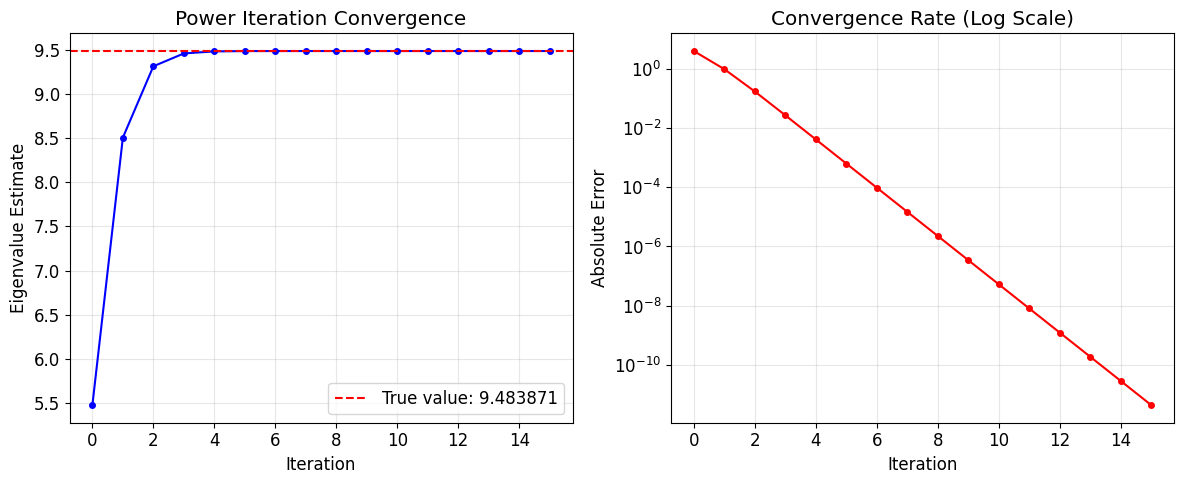

In [6]:
def power_iteration(A, num_iterations=100, tolerance=1e-10):
    """
    Compute largest eigenvalue and eigenvector using power iteration
    - Used in Google PageRank algorithm
    - Foundation of many iterative methods in ML
    """
    n = A.shape[0]
    # Initialize with random vector
    v = np.random.randn(n)
    v = v / np.linalg.norm(v)

    eigenvalue_history = []

    for i in range(num_iterations):
        # Power iteration step
        v_new = A @ v
        v_new = v_new / np.linalg.norm(v_new)

        # Estimate eigenvalue (Rayleigh quotient)
        eigenvalue = v.T @ A @ v
        eigenvalue_history.append(eigenvalue)

        # Check convergence
        if i > 0 and abs(eigenvalue_history[-1] - eigenvalue_history[-2]) < tolerance:
            print(f"Converged after {i+1} iterations")
            break

        v = v_new

    return eigenvalue, v, eigenvalue_history

def compare_eigendecomposition_methods():
    """Compare different eigendecomposition methods"""

    # Create a test matrix (symmetric for guaranteed real eigenvalues)
    np.random.seed(42)
    A = np.random.randn(4, 4)
    A = A.T @ A  # Make it symmetric positive definite

    print("🧪 Test Matrix A:")
    print(A)
    print()

    # Method 1: NumPy's built-in (uses LAPACK)
    import time

    start_time = time.time()
    eigenvals_numpy, eigenvecs_numpy = np.linalg.eig(A)
    numpy_time = time.time() - start_time

    # Sort eigenvalues in descending order
    idx = np.argsort(eigenvals_numpy)[::-1]
    eigenvals_numpy = eigenvals_numpy[idx]
    eigenvecs_numpy = eigenvecs_numpy[:, idx]

    print("📊 NumPy Results:")
    print(f"Eigenvalues: {eigenvals_numpy}")
    print(f"Time: {numpy_time:.6f} seconds")
    print()

    # Method 2: Power iteration for largest eigenvalue
    start_time = time.time()
    largest_eigenval, largest_eigenvec, history = power_iteration(A)
    power_time = time.time() - start_time

    print("🔄 Power Iteration Results:")
    print(f"Largest eigenvalue: {largest_eigenval:.6f}")
    print(f"NumPy largest: {eigenvals_numpy[0]:.6f}")
    print(f"Error: {abs(largest_eigenval - eigenvals_numpy[0]):.2e}")
    print(f"Time: {power_time:.6f} seconds")

    # Visualize power iteration convergence
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history, 'b-o', markersize=4)
    plt.axhline(y=eigenvals_numpy[0], color='r', linestyle='--',
                label=f'True value: {eigenvals_numpy[0]:.6f}')
    plt.xlabel('Iteration')
    plt.ylabel('Eigenvalue Estimate')
    plt.title('Power Iteration Convergence')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    errors = [abs(h - eigenvals_numpy[0]) for h in history]
    plt.semilogy(errors, 'r-o', markersize=4)
    plt.xlabel('Iteration')
    plt.ylabel('Absolute Error')
    plt.title('Convergence Rate (Log Scale)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return A, eigenvals_numpy, eigenvecs_numpy

A_test, eigenvals_test, eigenvecs_test = compare_eigendecomposition_methods()


# APPLICATION: PCA FOR DIMENSIONALITY REDUCTION

## 🎯 PCA: Eigendecomposition in Action

**PCA is eigendecomposition of covariance matrix!**

**The Algorithm:**
1. Center the data (subtract mean)
2. Compute covariance matrix C = X^T X / (n-1)
3. Find eigendecomposition: C = V Λ V^T
4. Eigenvalues = variance explained by each component
5. Eigenvectors = principal component directions

**Why PCA Dominates AI:**
- **Data compression**: JPEG uses DCT (related to PCA)
- **Feature extraction**: Reduce 10,000D images to 100D features  
- **Noise reduction**: Keep only high-variance components
- **Visualization**: Project high-D data to 2D/3D
- **Preprocessing**: Decorrelate features for better ML performance

**Industry Usage:**
- **Netflix**: Recommendation systems (collaborative filtering)
- **Google Photos**: Face clustering and search
- **Autonomous vehicles**: Sensor fusion and feature extraction
- **Financial**: Risk modeling and portfolio optimization

📊 Step-by-Step PCA Implementation
Step 1 - Original data shape: (300, 2)
Step 1 - Data mean before centering: [2.01264951 3.01482455]
Step 1 - Data mean after centering: [ 1.58391818e-16 -1.56837506e-15]

Step 2 - Covariance matrix:
[[1.96442125 1.36765333]
 [1.36765333 1.06620247]]

Step 3 - Eigenvalues: [2.95481694 0.07580678]
Step 3 - Variance explained: [97.49864101  2.50135899]%
Step 3 - Eigenvectors (columns are PCs):
[[ 0.8099348  -0.58651993]
 [ 0.58651993  0.8099348 ]]

Step 4 - PCA transformed data shape: (300, 2)


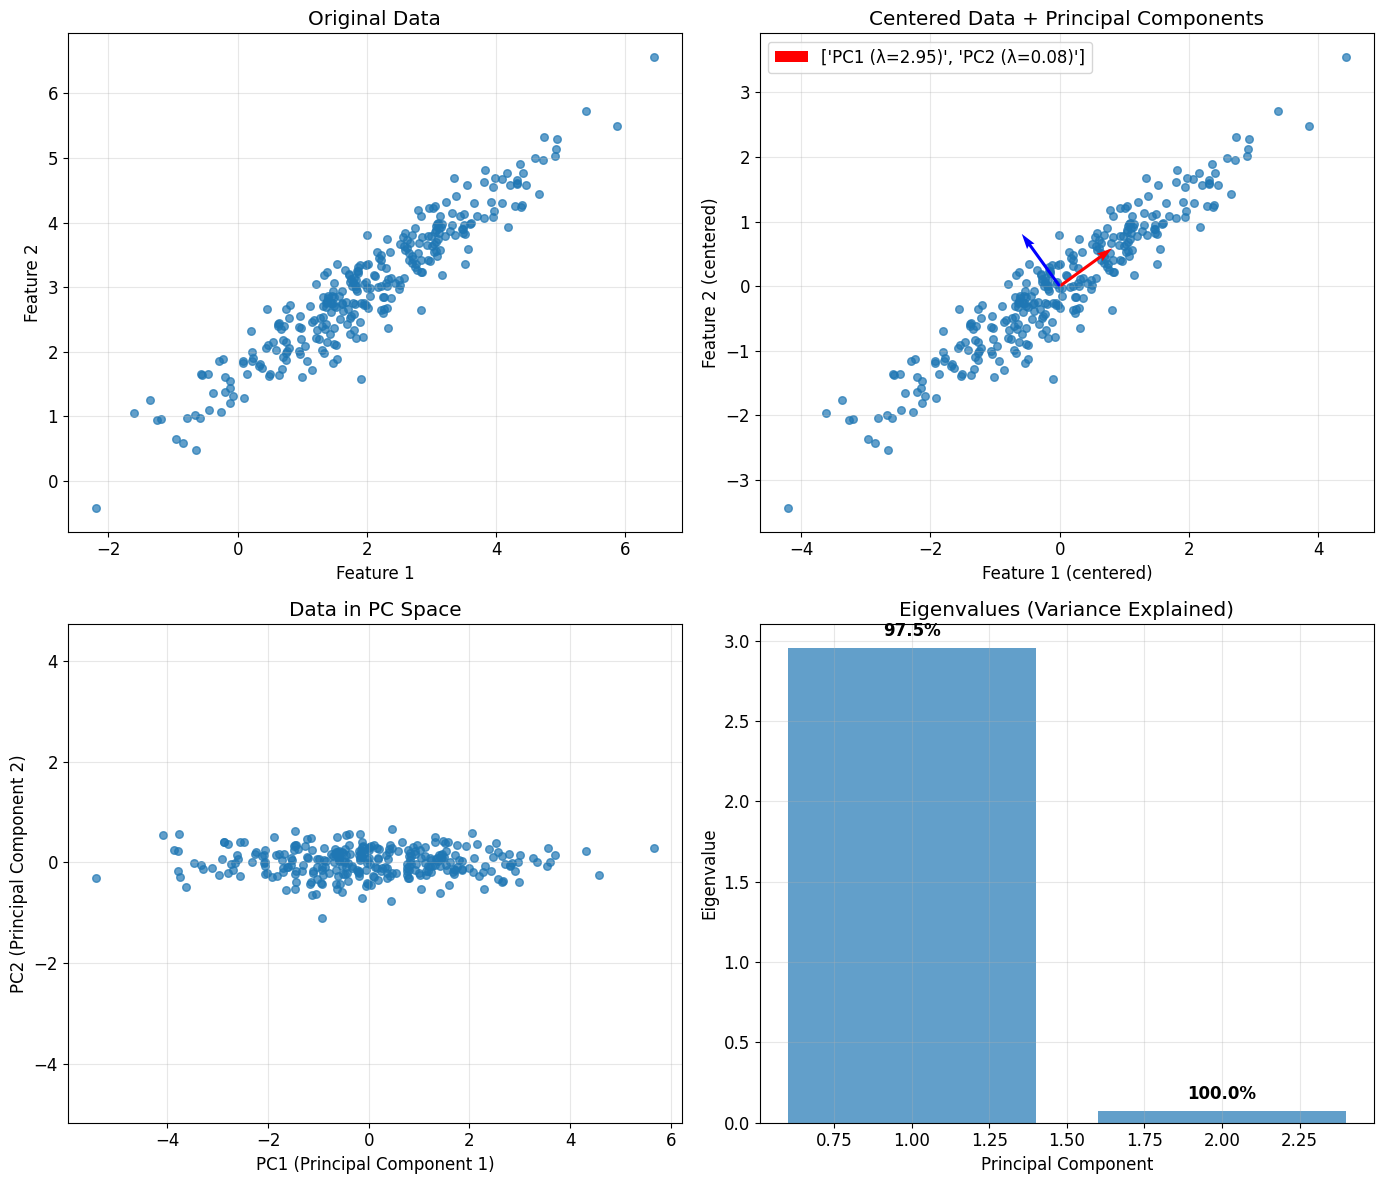

In [7]:
def demonstrate_pca_step_by_step():
    """Implement PCA from scratch using eigendecomposition"""

    # Generate 2D dataset with correlation
    np.random.seed(42)
    n_samples = 300

    # Create correlated data
    mean = [2, 3]
    cov = [[2, 1.5], [1.5, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)

    print("📊 Step-by-Step PCA Implementation")
    print("=" * 50)

    # Step 1: Center the data
    data_centered = data - np.mean(data, axis=0)
    print(f"Step 1 - Original data shape: {data.shape}")
    print(f"Step 1 - Data mean before centering: {np.mean(data, axis=0)}")
    print(f"Step 1 - Data mean after centering: {np.mean(data_centered, axis=0)}")

    # Step 2: Compute covariance matrix
    cov_matrix = np.cov(data_centered.T)
    print(f"\nStep 2 - Covariance matrix:")
    print(cov_matrix)

    # Step 3: Eigendecomposition of covariance matrix
    eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

    # Sort by eigenvalue magnitude (descending)
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    print(f"\nStep 3 - Eigenvalues: {eigenvals}")
    print(f"Step 3 - Variance explained: {eigenvals / np.sum(eigenvals) * 100}%")
    print(f"Step 3 - Eigenvectors (columns are PCs):")
    print(eigenvecs)

    # Step 4: Project data onto principal components
    data_pca = data_centered @ eigenvecs
    print(f"\nStep 4 - PCA transformed data shape: {data_pca.shape}")

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Original data
    axes[0,0].scatter(data[:, 0], data[:, 1], alpha=0.7, s=30)
    axes[0,0].set_title('Original Data')
    axes[0,0].set_xlabel('Feature 1')
    axes[0,0].set_ylabel('Feature 2')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].axis('equal')

    # Centered data with principal components
    axes[0,1].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.7, s=30)

    # Plot principal components as arrows
    origin = np.array([[0, 0], [0, 0]])
    axes[0,1].quiver(*origin, eigenvecs[0, :], eigenvecs[1, :],
                     scale=1, scale_units='xy', angles='xy',
                     color=['red', 'blue'], width=0.005,
                     label=['PC1 (λ={:.2f})'.format(eigenvals[0]),
                            'PC2 (λ={:.2f})'.format(eigenvals[1])])

    axes[0,1].set_title('Centered Data + Principal Components')
    axes[0,1].set_xlabel('Feature 1 (centered)')
    axes[0,1].set_ylabel('Feature 2 (centered)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].axis('equal')

    # PCA transformed data
    axes[1,0].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7, s=30)
    axes[1,0].set_title('Data in PC Space')
    axes[1,0].set_xlabel('PC1 (Principal Component 1)')
    axes[1,0].set_ylabel('PC2 (Principal Component 2)')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].axis('equal')

    # Variance explained
    cumvar = np.cumsum(eigenvals) / np.sum(eigenvals) * 100
    axes[1,1].bar(range(1, len(eigenvals)+1), eigenvals, alpha=0.7)
    axes[1,1].set_title('Eigenvalues (Variance Explained)')
    axes[1,1].set_xlabel('Principal Component')
    axes[1,1].set_ylabel('Eigenvalue')
    axes[1,1].grid(True, alpha=0.3)

    # Add cumulative variance as text
    for i, (val, cum) in enumerate(zip(eigenvals, cumvar)):
        axes[1,1].text(i+1, val + 0.05, f'{cum:.1f}%',
                      ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return data, data_centered, eigenvals, eigenvecs, data_pca

original_data, centered_data, pca_eigenvals, pca_eigenvecs, pca_data = demonstrate_pca_step_by_step()


# REAL-WORLD APPLICATION: EIGENFACES FOR FACE RECOGNITION  

## 🔍 Eigenfaces: PCA for Computer Vision

**The Original Face Recognition Algorithm (1991):**
- Each face image = high-dimensional vector
- PCA finds principal "face" directions = eigenfaces
- New faces projected onto eigenface space
- Recognition by comparing projections

**Why This Revolutionized Computer Vision:**
- **Dimensionality reduction**: 10,000D → 50D while keeping identity info
- **Noise robustness**: Principal components ignore pixel-level noise
- **Computational efficiency**: Fast dot products for recognition
- **Foundation for modern CV**: Inspired deep learning approaches

**Modern Applications:**
- **Snapchat filters**: Real-time face detection and tracking
- **iPhone Face ID**: Uses similar mathematical principles
- **Photo organization**: Google Photos automatic face grouping
- **Security systems**: Airport facial recognition


📸 Loading face dataset...
✅ Dataset loaded successfully!
📊 Dataset info:
   Number of samples: 2370
   Image dimensions: (50, 37) = 1850 pixels
   Number of people: 34
   People: ['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger']...

🧮 Computing eigenfaces...


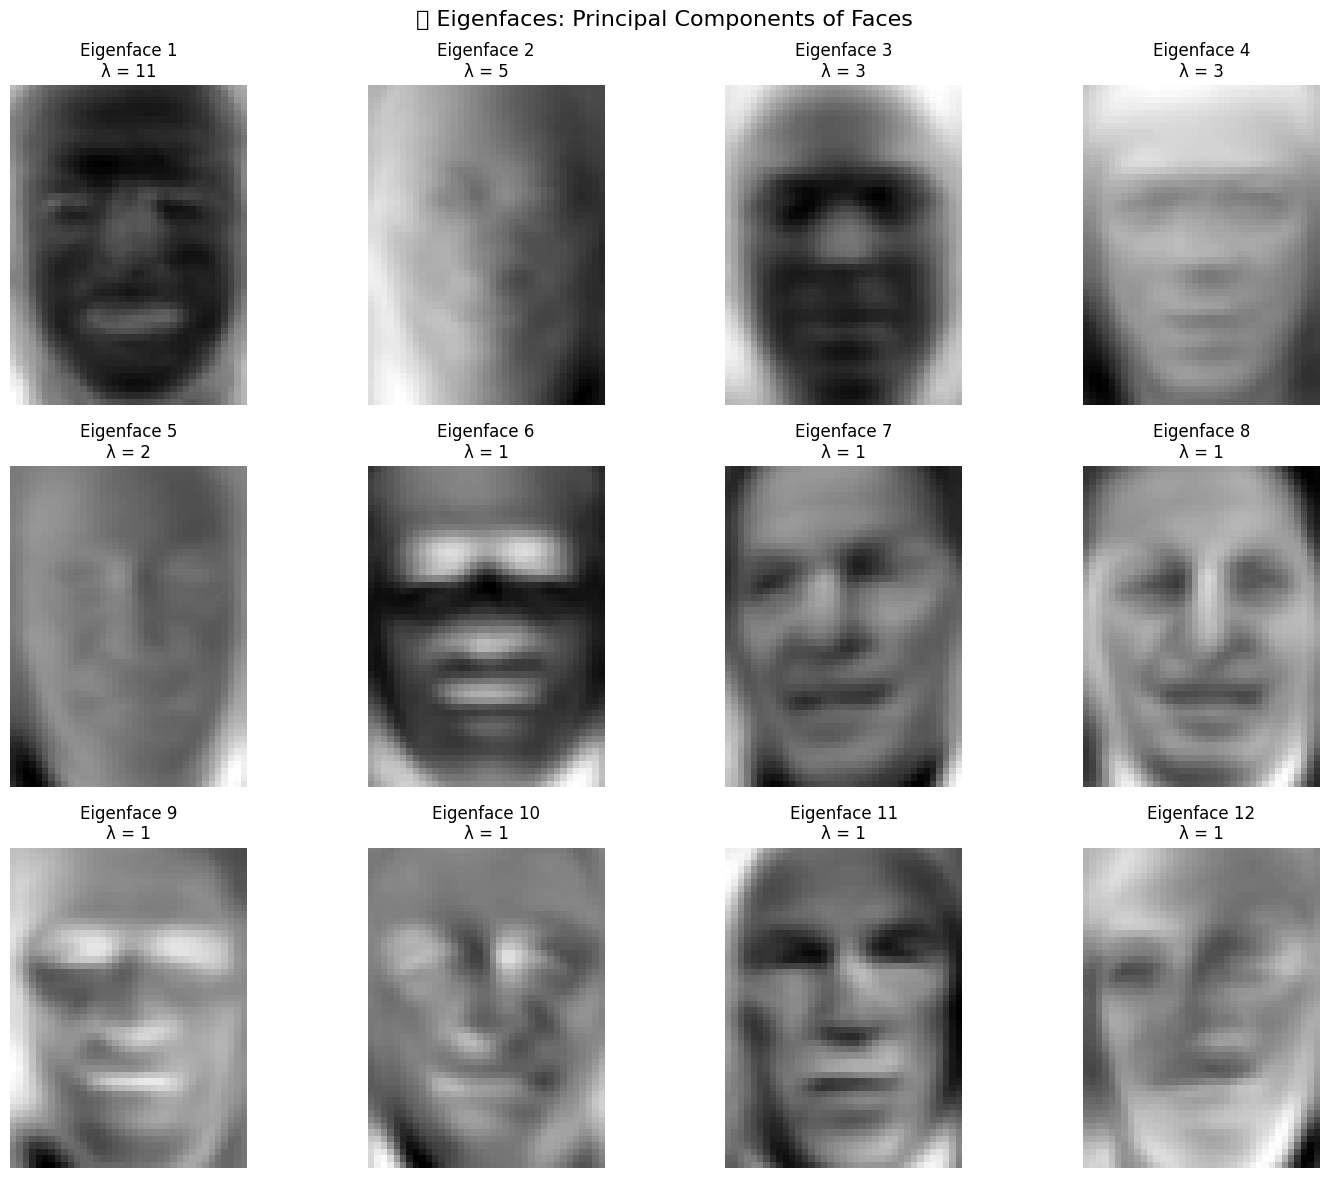

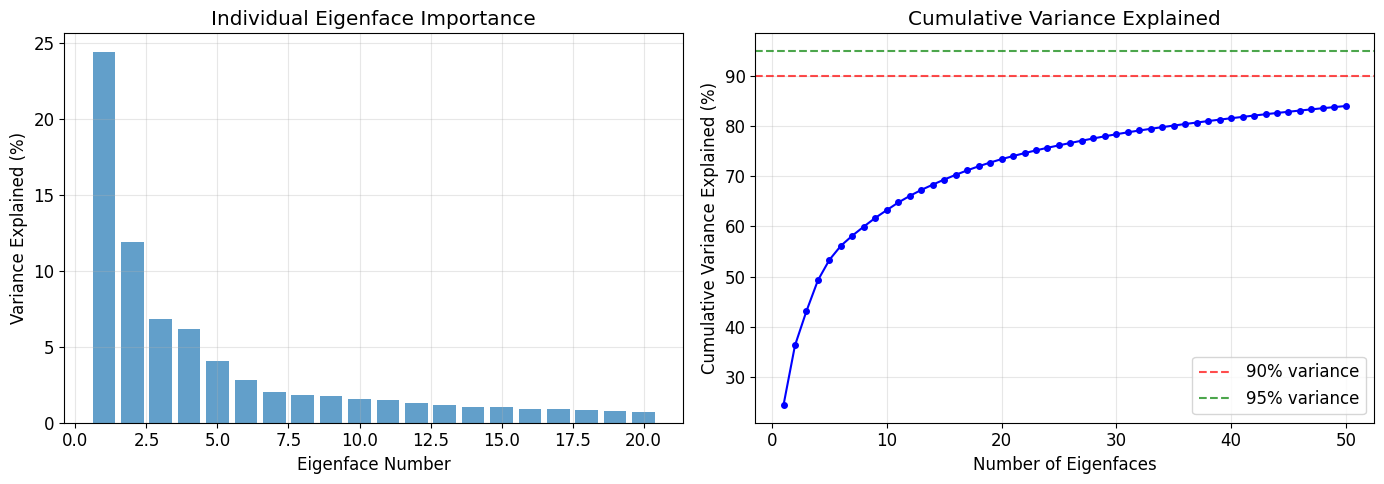

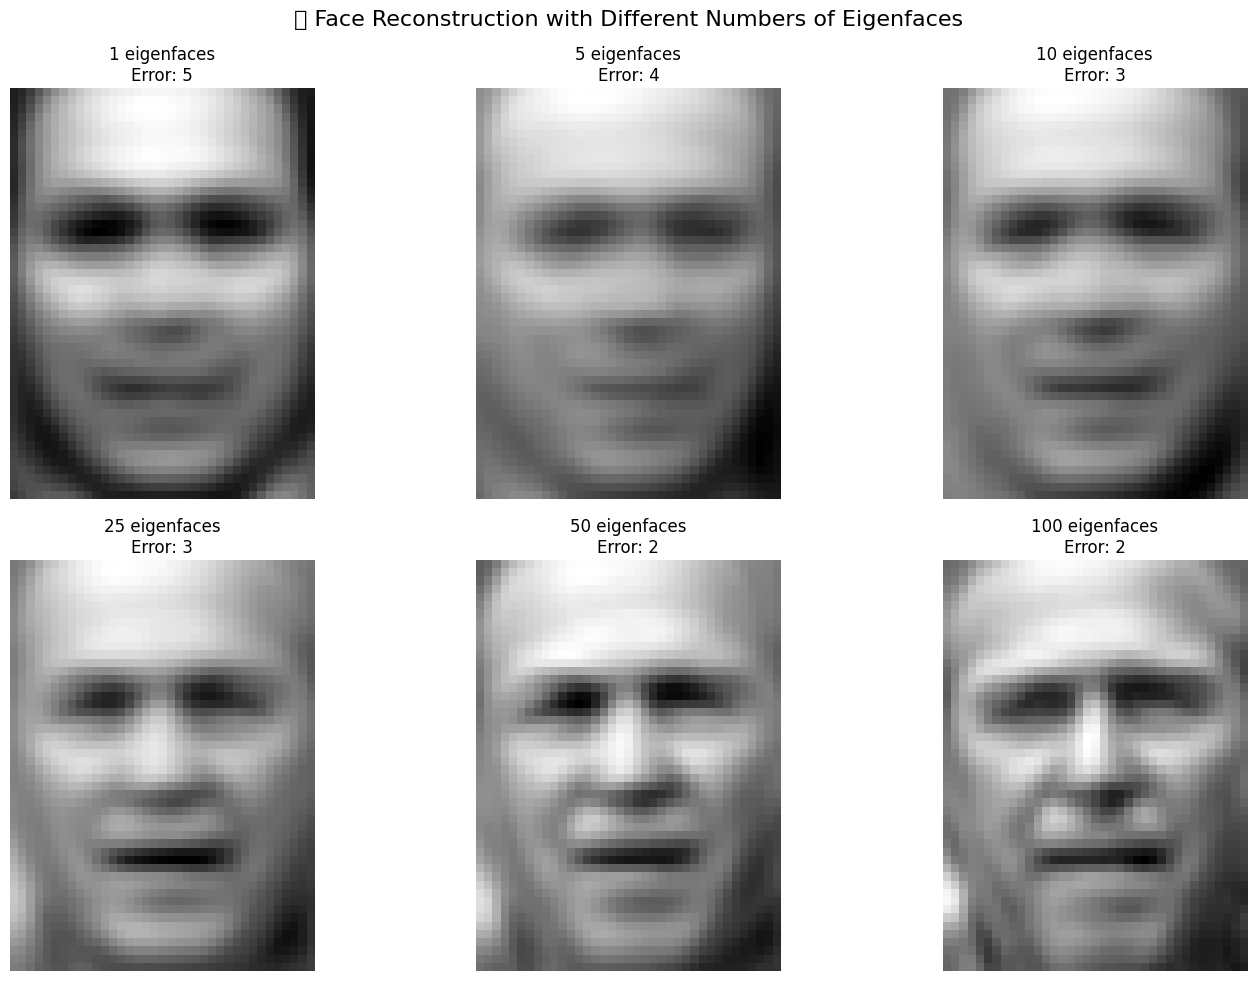

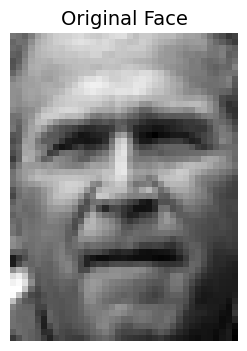

💡 Key Insight: Even with just 50 eigenfaces (out of 1850 pixels),
   we can reconstruct faces with high fidelity!
   This is the power of eigendecomposition for compression.


In [8]:
def demonstrate_eigenfaces():
    """Implement eigenfaces using real face dataset"""

    print("📸 Loading face dataset...")

    # Load the Labeled Faces in the Wild dataset
    try:
        lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=0.4,
                                     data_home='./datasets/')

        # Get the data
        faces = lfw_people.data  # Each row is a flattened face image
        n_samples, n_features = faces.shape
        n_classes = len(lfw_people.target_names)

        print(f"✅ Dataset loaded successfully!")
        print(f"📊 Dataset info:")
        print(f"   Number of samples: {n_samples}")
        print(f"   Image dimensions: {lfw_people.images.shape[1:]} = {n_features} pixels")
        print(f"   Number of people: {n_classes}")
        print(f"   People: {lfw_people.target_names[:5]}...")

        # Implement PCA from scratch for eigenfaces
        print("\n🧮 Computing eigenfaces...")

        # Center the data
        mean_face = np.mean(faces, axis=0)
        faces_centered = faces - mean_face

        # Compute covariance matrix (this is huge: n_features x n_features!)
        # Instead, use the trick: compute eigenvectors of faces_centered @ faces_centered.T
        # then transform back (more efficient for n_samples < n_features)

        if n_samples < n_features:
            # More efficient approach for high-dimensional data
            cov_small = faces_centered @ faces_centered.T / (n_samples - 1)
            eigenvals, eigenvecs_small = np.linalg.eig(cov_small)

            # Transform back to original space
            eigenfaces = faces_centered.T @ eigenvecs_small
            # Normalize eigenvectors
            for i in range(eigenfaces.shape[1]):
                eigenfaces[:, i] = eigenfaces[:, i] / np.linalg.norm(eigenfaces[:, i])
        else:
            # Standard approach
            cov_matrix = np.cov(faces_centered.T)
            eigenvals, eigenfaces = np.linalg.eig(cov_matrix)

        # Sort by eigenvalue (descending)
        idx = np.argsort(eigenvals)[::-1]
        eigenvals = eigenvals[idx].real
        eigenfaces = eigenfaces[:, idx].real

        # Show results
        n_components = 12
        h, w = lfw_people.images.shape[1], lfw_people.images.shape[2]

        fig, axes = plt.subplots(3, 4, figsize=(15, 12))
        fig.suptitle('👻 Eigenfaces: Principal Components of Faces', fontsize=16)

        for i in range(n_components):
            row, col = i // 4, i % 4
            eigenface = eigenfaces[:, i].reshape(h, w)

            axes[row, col].imshow(eigenface, cmap='gray')
            axes[row, col].set_title(f'Eigenface {i+1}\nλ = {eigenvals[i]:.0f}', fontsize=12)
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

        # Show variance explained
        variance_ratio = eigenvals / np.sum(eigenvals) * 100
        cumulative_variance = np.cumsum(variance_ratio)

        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.bar(range(1, 21), variance_ratio[:20], alpha=0.7)
        plt.xlabel('Eigenface Number')
        plt.ylabel('Variance Explained (%)')
        plt.title('Individual Eigenface Importance')
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(range(1, 51), cumulative_variance[:50], 'bo-', markersize=4)
        plt.axhline(y=90, color='r', linestyle='--', alpha=0.7, label='90% variance')
        plt.axhline(y=95, color='g', linestyle='--', alpha=0.7, label='95% variance')
        plt.xlabel('Number of Eigenfaces')
        plt.ylabel('Cumulative Variance Explained (%)')
        plt.title('Cumulative Variance Explained')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Demonstrate face reconstruction
        demonstrate_face_reconstruction(faces, mean_face, eigenfaces, h, w, lfw_people)

        return faces, mean_face, eigenfaces, eigenvals

    except Exception as e:
        print(f"❌ Could not load face dataset: {e}")
        print("📝 Generating synthetic face-like data for demonstration...")
        return generate_synthetic_faces()

def demonstrate_face_reconstruction(faces, mean_face, eigenfaces, h, w, lfw_people):
    """Show how faces can be reconstructed using different numbers of eigenfaces"""

    # Select a test face
    test_idx = 0
    test_face = faces[test_idx]
    test_face_centered = test_face - mean_face

    # Reconstruct using different numbers of components
    n_components_list = [1, 5, 10, 25, 50, 100]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('🔄 Face Reconstruction with Different Numbers of Eigenfaces', fontsize=16)

    for i, n_comp in enumerate(n_components_list):
        row, col = i // 3, i % 3

        # Project onto eigenspace and reconstruct
        coefficients = test_face_centered @ eigenfaces[:, :n_comp]
        reconstructed = mean_face + coefficients @ eigenfaces[:, :n_comp].T

        # Calculate reconstruction error
        error = np.linalg.norm(test_face - reconstructed)

        # Display
        axes[row, col].imshow(reconstructed.reshape(h, w), cmap='gray')
        axes[row, col].set_title(f'{n_comp} eigenfaces\nError: {error:.0f}', fontsize=12)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

    # Show original for comparison
    plt.figure(figsize=(4, 4))
    plt.imshow(test_face.reshape(h, w), cmap='gray')
    plt.title('Original Face', fontsize=14)
    plt.axis('off')
    plt.show()

    print(f"💡 Key Insight: Even with just 50 eigenfaces (out of {len(eigenfaces)} pixels),")
    print(f"   we can reconstruct faces with high fidelity!")
    print(f"   This is the power of eigendecomposition for compression.")

def generate_synthetic_faces():
    """Generate synthetic face-like data if real dataset unavailable"""
    print("🎭 Generating synthetic face-like patterns...")

    # Create face-like patterns using sine waves and gaussian blobs
    h, w = 64, 64
    n_samples = 100
    faces = []

    for i in range(n_samples):
        # Create base pattern
        x = np.linspace(-2, 2, w)
        y = np.linspace(-2, 2, h)
        X, Y = np.meshgrid(x, y)

        # Face-like pattern with random variations
        face = (np.exp(-(X**2 + Y**2)/2) *
               (1 + 0.3 * np.sin(np.random.rand() * X * 10) * np.cos(np.random.rand() * Y * 10)))

        # Add eyes
        eye1 = np.exp(-((X + 0.5)**2 + (Y + 0.3)**2)/0.1)
        eye2 = np.exp(-((X - 0.5)**2 + (Y + 0.3)**2)/0.1)
        face += eye1 + eye2

        # Add noise
        face += 0.1 * np.random.randn(h, w)
        faces.append(face.flatten())

    faces = np.array(faces)

    # Apply PCA
    mean_face = np.mean(faces, axis=0)
    faces_centered = faces - mean_face
    cov_matrix = np.cov(faces_centered.T)
    eigenvals, eigenfaces = np.linalg.eig(cov_matrix)

    # Sort by eigenvalue
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx].real
    eigenfaces = eigenfaces[:, idx].real

    return faces, mean_face, eigenfaces, eigenvals

# Execute eigenfaces demonstration
faces_data, mean_face_data, eigenfaces_data, eigenvals_data = demonstrate_eigenfaces()


# DEEP LEARNING CONNECTION: EIGENDECOMPOSITION IN NEURAL NETWORKS

## 🧠 Eigendecomposition in Modern Deep Learning

**Where Eigendecomposition Appears in AI:**

1. **Weight Matrix Analysis**: Understanding network capacity and expressiveness
2. **Gradient Descent Optimization**: Hessian eigenvalues determine convergence
3. **Batch Normalization**: Whitening transformation uses eigendecomposition  
4. **Attention Mechanisms**: Self-attention computes eigendecomposition of similarity matrices
5. **Graph Neural Networks**: Spectral convolutions use graph Laplacian eigendecomposition
6. **Generative Models**: VAE latent spaces and GAN training dynamics

**Critical for AI Video Engineers:**
- **Network Pruning**: Remove directions with small eigenvalues
- **Transfer Learning**: Understand which features transfer between domains
- **Model Compression**: Rank approximation using top eigencomponents
- **Training Stability**: Monitor eigenvalue spectrum for gradient explosion

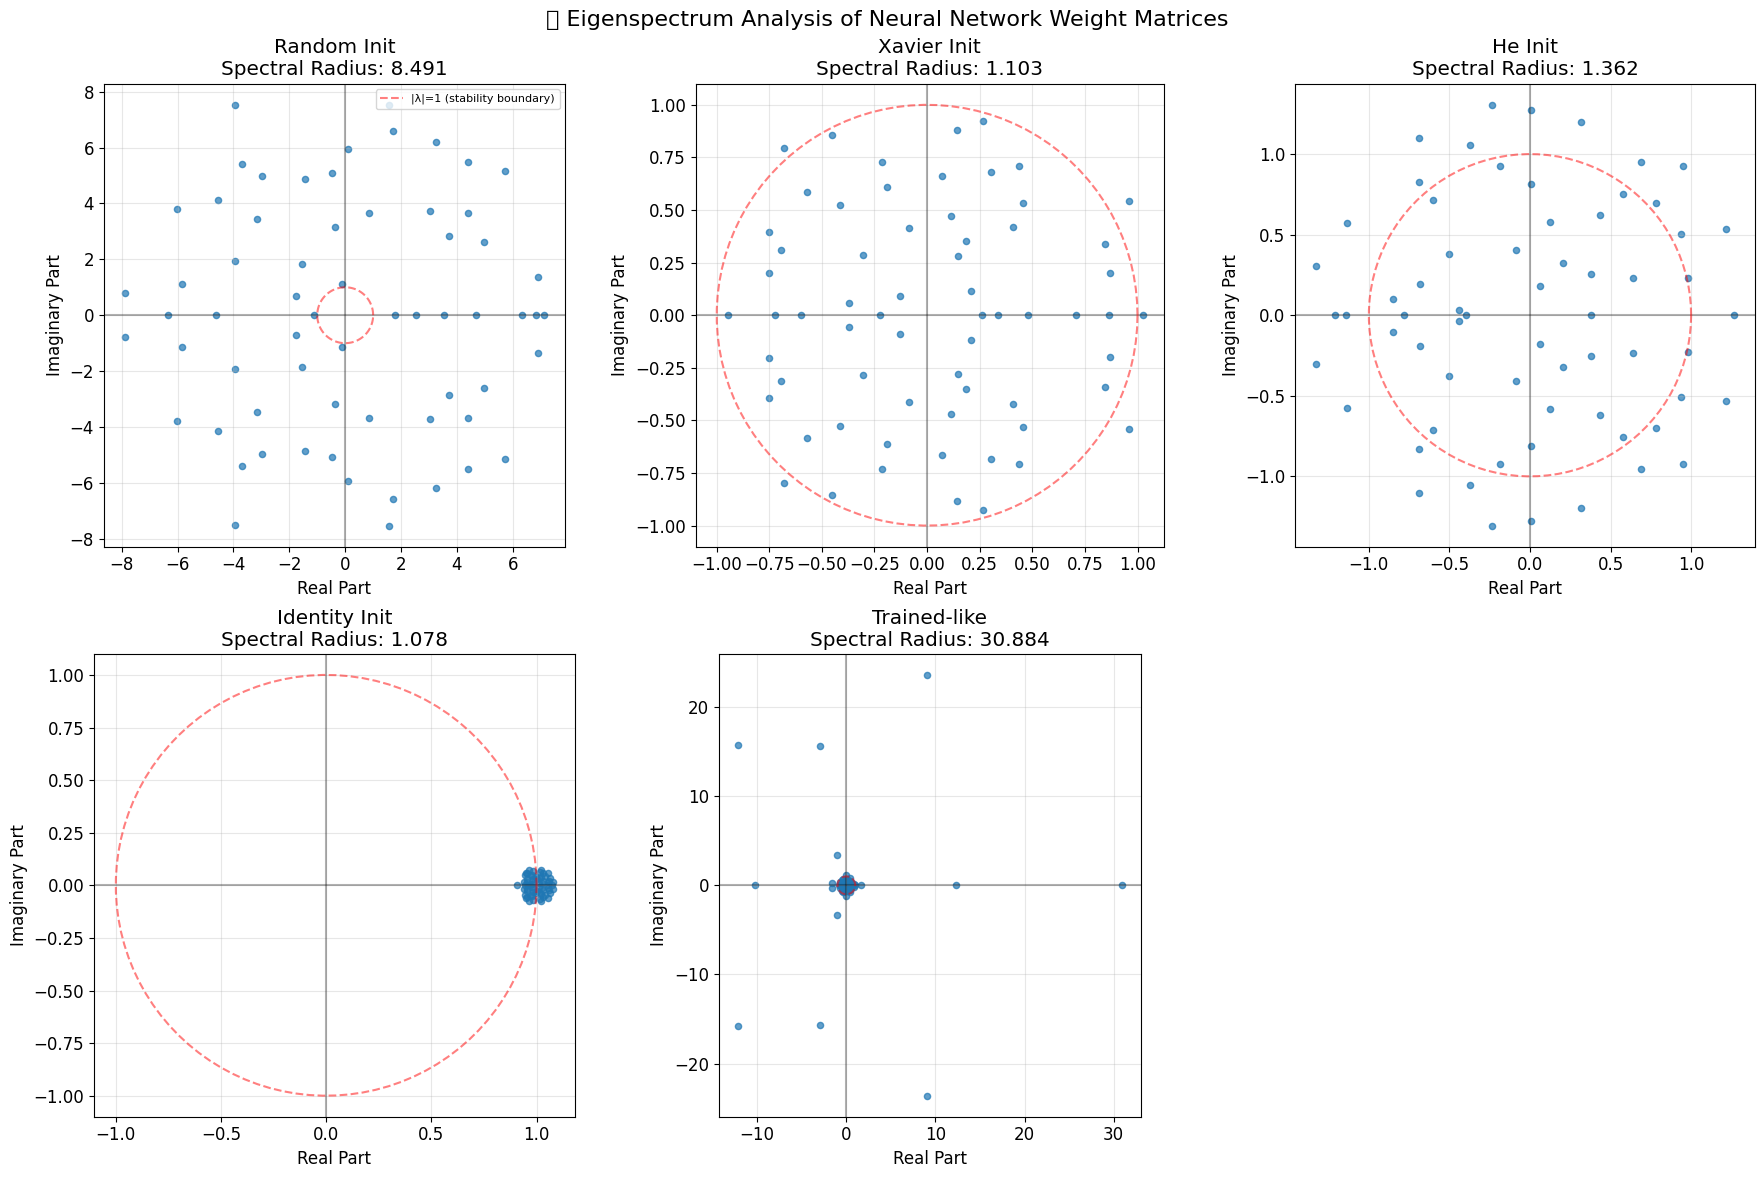

🎯 Training Implications:

Random Init:
  Spectral radius: 8.491
  Condition number: 7.7
  ⚠️  Risk of exploding gradients (spectral radius > 1)

Xavier Init:
  Spectral radius: 1.103
  Condition number: 6.9
  ⚠️  Risk of exploding gradients (spectral radius > 1)

He Init:
  Spectral radius: 1.362
  Condition number: 7.1
  ⚠️  Risk of exploding gradients (spectral radius > 1)

Identity Init:
  Spectral radius: 1.078
  Condition number: 1.2
  ✅ Good spectral properties for training

Trained-like:
  Spectral radius: 30.884
  Condition number: 493.8
  ⚠️  Risk of exploding gradients (spectral radius > 1)


In [9]:
def analyze_neural_network_weights():
    """Analyze eigenspectrum of neural network weight matrices"""

    # Simulate different types of weight matrices you'd find in neural networks
    np.random.seed(42)

    # Different initialization strategies
    weight_matrices = {
        'Random Init': np.random.randn(64, 64),
        'Xavier Init': np.random.randn(64, 64) / np.sqrt(64),
        'He Init': np.random.randn(64, 64) * np.sqrt(2/64),
        'Identity Init': np.eye(64) + 0.01 * np.random.randn(64, 64),
        'Trained-like': None  # Will generate this
    }

    # Create a "trained" weight matrix (low rank structure)
    U = np.random.randn(64, 10)  # Low rank factors
    V = np.random.randn(10, 64)
    weight_matrices['Trained-like'] = U @ V + 0.1 * np.random.randn(64, 64)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🔍 Eigenspectrum Analysis of Neural Network Weight Matrices', fontsize=16)

    for idx, (name, W) in enumerate(weight_matrices.items()):
        row, col = idx // 3, idx % 3

        # Compute eigendecomposition
        eigenvals = np.linalg.eigvals(W)
        eigenvals_real = eigenvals.real
        eigenvals_imag = eigenvals.imag

        # Plot eigenvalue distribution
        axes[row, col].scatter(eigenvals_real, eigenvals_imag, alpha=0.7, s=20)
        axes[row, col].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[row, col].axvline(x=0, color='k', linestyle='-', alpha=0.3)
        axes[row, col].set_xlabel('Real Part')
        axes[row, col].set_ylabel('Imaginary Part')
        axes[row, col].set_title(f'{name}\nSpectral Radius: {np.max(np.abs(eigenvals)):.3f}')
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].set_aspect('equal')

        # Add unit circle for stability reference
        theta = np.linspace(0, 2*np.pi, 100)
        axes[row, col].plot(np.cos(theta), np.sin(theta), 'r--', alpha=0.5,
                           label='|λ|=1 (stability boundary)')
        if idx == 0:  # Only show legend for first subplot
            axes[row, col].legend(fontsize=8)

    # Remove empty subplot
    fig.delaxes(axes[1, 2])

    plt.tight_layout()
    plt.show()

    # Analyze implications for training
    print("🎯 Training Implications:")
    print("=" * 50)

    for name, W in weight_matrices.items():
        eigenvals = np.linalg.eigvals(W)
        spectral_radius = np.max(np.abs(eigenvals))
        condition_number = np.max(np.abs(eigenvals)) / np.min(np.abs(eigenvals[np.abs(eigenvals) > 1e-10]))

        print(f"\n{name}:")
        print(f"  Spectral radius: {spectral_radius:.3f}")
        print(f"  Condition number: {condition_number:.1f}")

        if spectral_radius > 1.1:
            print(f"  ⚠️  Risk of exploding gradients (spectral radius > 1)")
        elif spectral_radius < 0.9:
            print(f"  ⚠️  Risk of vanishing gradients (spectral radius < 1)")
        else:
            print(f"  ✅ Good spectral properties for training")

analyze_neural_network_weights()

# COMPARISON: SVD vs EIGENDECOMPOSITION

## ⚖️ SVD vs Eigendecomposition: The Ultimate Comparison

**Eigendecomposition: A = V Λ V^(-1)**
- ✅ Works for: Square matrices
- ✅ Best for: Understanding dynamics, stability analysis
- ✅ Applications: PCA (on covariance), PageRank, Markov chains
- ❌ Limitation: Only square matrices, may have complex eigenvalues

**SVD: A = U Σ V^T**  
- ✅ Works for: ANY matrix (rectangular too!)
- ✅ Best for: Data analysis, compression, pseudoinverse
- ✅ Applications: Collaborative filtering, image compression, NLP
- ✅ Guarantee: Always real, non-negative singular values

**When to Use Which in AI:**
- **PCA**: Use SVD on data matrix (more stable than eigendecomposition of covariance)
- **Recommender Systems**: SVD for matrix completion
- **NLP**: SVD for Latent Semantic Analysis (LSA)
- **Computer Vision**: Both! Eigendecomposition for understanding, SVD for computation

🎬 Movie Rating Matrix Analysis
   Shape: (100, 50) (users × movies)
   True rank: 5

📊 Method 1: Direct SVD
   U shape: (100, 50) (users × factors)
   s shape: (50,) (singular values)
   Vt shape: (50, 50) (factors × movies)
   Singular values: [84.01152511 72.47664389 68.11502907 58.32986347 53.00304405  7.90446319
  7.50248543  7.31846061  7.03742993  6.90567823]

📊 Method 2: Eigendecomposition of User Covariance
   Top eigenvalues: [144.03951737 107.20130429  94.68688132  69.43618311  57.33311589
   1.27511303   1.14872016   1.09305848   1.01072286   0.97323249]
   Relationship: σ² ≈ λ × (n-1)

📊 Method 3: Eigendecomposition of Movie Covariance


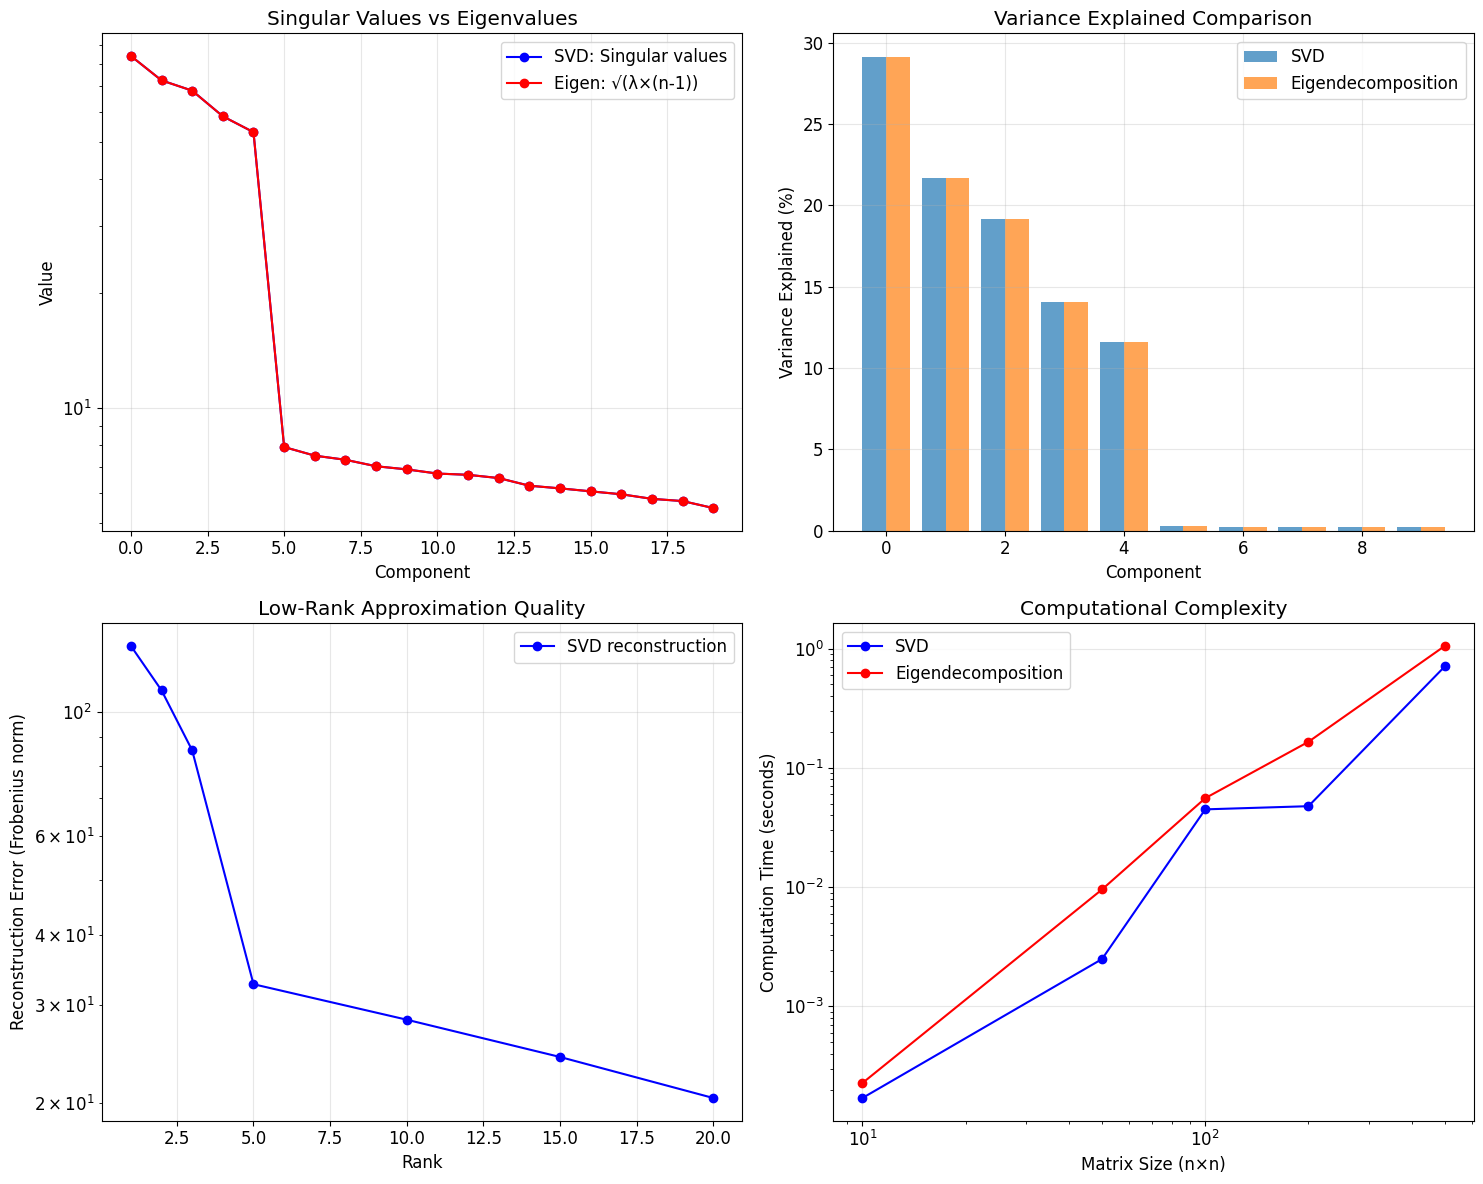


🎯 Practical Recommendations:
📊 For PCA: Use SVD of data matrix (more numerically stable)
🎬 For Recommender Systems: Use SVD for matrix completion
🔍 For Spectral Analysis: Use eigendecomposition of graph Laplacian
🧠 For Neural Networks: Monitor eigenspectrum of weight matrices
⚡ For Large Matrices: Use randomized SVD for efficiency


In [10]:
def compare_svd_vs_eigendecomposition():
    """Compare SVD and eigendecomposition on the same dataset"""

    # Create a rectangular data matrix (movies x users ratings)
    np.random.seed(42)
    n_users, n_movies = 100, 50

    # Create realistic rating matrix with latent factors
    # Users have preferences for genres, movies belong to genres
    n_genres = 5
    user_preferences = np.random.randn(n_users, n_genres)
    movie_genres = np.random.randn(n_genres, n_movies)

    # True ratings based on user-genre-movie interactions
    ratings_true = user_preferences @ movie_genres
    ratings_observed = ratings_true + 0.5 * np.random.randn(n_users, n_movies)

    print(f"🎬 Movie Rating Matrix Analysis")
    print(f"   Shape: {ratings_observed.shape} (users × movies)")
    print(f"   True rank: {n_genres}")

    # Method 1: SVD of the data matrix
    print(f"\n📊 Method 1: Direct SVD")
    U, s, Vt = np.linalg.svd(ratings_observed, full_matrices=False)

    print(f"   U shape: {U.shape} (users × factors)")
    print(f"   s shape: {s.shape} (singular values)")
    print(f"   Vt shape: {Vt.shape} (factors × movies)")
    print(f"   Singular values: {s[:10]}")

    # Method 2: Eigendecomposition of covariance matrices
    print(f"\n📊 Method 2: Eigendecomposition of User Covariance")
    user_cov = ratings_observed @ ratings_observed.T / (n_movies - 1)
    eigenvals_users, eigenvecs_users = np.linalg.eig(user_cov)
    eigenvals_users = np.sort(eigenvals_users.real)[::-1]

    print(f"   Top eigenvalues: {eigenvals_users[:10]}")
    print(f"   Relationship: σ² ≈ λ × (n-1)")

    print(f"\n📊 Method 3: Eigendecomposition of Movie Covariance")
    movie_cov = ratings_observed.T @ ratings_observed / (n_users - 1)
    eigenvals_movies, eigenvecs_movies = np.linalg.eig(movie_cov)
    eigenvals_movies = np.sort(eigenvals_movies.real)[::-1]

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Singular values vs eigenvalues
    axes[0, 0].semilogy(s[:20], 'bo-', label='SVD: Singular values', markersize=6)
    axes[0, 0].semilogy(np.sqrt(eigenvals_users[:20] * (n_movies-1)), 'ro-',
                       label='Eigen: √(λ×(n-1))', markersize=6)
    axes[0, 0].set_xlabel('Component')
    axes[0, 0].set_ylabel('Value')
    axes[0, 0].set_title('Singular Values vs Eigenvalues')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Variance explained comparison
    svd_variance = (s**2) / np.sum(s**2) * 100
    eigen_variance = eigenvals_users / np.sum(eigenvals_users) * 100

    axes[0, 1].bar(np.arange(10) - 0.2, svd_variance[:10], 0.4,
                  label='SVD', alpha=0.7)
    axes[0, 1].bar(np.arange(10) + 0.2, eigen_variance[:10], 0.4,
                  label='Eigendecomposition', alpha=0.7)
    axes[0, 1].set_xlabel('Component')
    axes[0, 1].set_ylabel('Variance Explained (%)')
    axes[0, 1].set_title('Variance Explained Comparison')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Low-rank approximation comparison
    ranks = [1, 2, 3, 5, 10, 15, 20]
    svd_errors = []

    for r in ranks:
        # SVD approximation
        approx_svd = U[:, :r] @ np.diag(s[:r]) @ Vt[:r, :]
        error_svd = np.linalg.norm(ratings_observed - approx_svd, 'fro')
        svd_errors.append(error_svd)

    axes[1, 0].semilogy(ranks, svd_errors, 'bo-', label='SVD reconstruction', markersize=6)
    axes[1, 0].set_xlabel('Rank')
    axes[1, 0].set_ylabel('Reconstruction Error (Frobenius norm)')
    axes[1, 0].set_title('Low-Rank Approximation Quality')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Computational complexity comparison
    matrix_sizes = [10, 50, 100, 200, 500]
    svd_times = []
    eigen_times = []

    for n in matrix_sizes:
        # Generate test matrix
        test_matrix = np.random.randn(n, n)

        # Time SVD
        import time
        start = time.time()
        _ = np.linalg.svd(test_matrix)
        svd_time = time.time() - start
        svd_times.append(svd_time)

        # Time eigendecomposition
        start = time.time()
        _ = np.linalg.eig(test_matrix)
        eigen_time = time.time() - start
        eigen_times.append(eigen_time)

    axes[1, 1].loglog(matrix_sizes, svd_times, 'bo-', label='SVD', markersize=6)
    axes[1, 1].loglog(matrix_sizes, eigen_times, 'ro-', label='Eigendecomposition', markersize=6)
    axes[1, 1].set_xlabel('Matrix Size (n×n)')
    axes[1, 1].set_ylabel('Computation Time (seconds)')
    axes[1, 1].set_title('Computational Complexity')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Practical recommendations
    print(f"\n🎯 Practical Recommendations:")
    print(f"=" * 50)
    print(f"📊 For PCA: Use SVD of data matrix (more numerically stable)")
    print(f"🎬 For Recommender Systems: Use SVD for matrix completion")
    print(f"🔍 For Spectral Analysis: Use eigendecomposition of graph Laplacian")
    print(f"🧠 For Neural Networks: Monitor eigenspectrum of weight matrices")
    print(f"⚡ For Large Matrices: Use randomized SVD for efficiency")

    return ratings_observed, U, s, Vt

ratings_matrix, U_svd, s_svd, Vt_svd = compare_svd_vs_eigendecomposition()

# ADVANCED: GENERALIZED EIGENDECOMPOSITION FOR AI

## 🚀 Advanced Topic: Generalized Eigendecomposition

**Standard**: A v = λ v
**Generalized**: A v = λ B v

**Why This Matters in AI:**
- **Linear Discriminant Analysis (LDA)**: Ax = λBx where A=between-class scatter, B=within-class scatter
- **Canonical Correlation Analysis (CCA)**: Finding correlations between datasets
- **Metric Learning**: Learning distance metrics for similarity matching
- **Graph Neural Networks**: Normalized graph Laplacian L = D^(-1/2) A D^(-1/2)

**Industry Applications:**
- **Face Verification**: LDA for discriminative feature learning
- **Multi-Modal Learning**: CCA for vision-language alignment (CLIP-style models)
- **Recommender Systems**: Metric learning for user-item similarity
- **Autonomous Driving**: Sensor fusion using canonical correlation

🎯 Linear Discriminant Analysis (LDA)
Class 1 samples: 150
Class 2 samples: 100
Feature dimension: 2

Class means:
  Class 1: [2.02893409 3.04032209]
  Class 2: [-1.04491519 -0.9479006 ]
  Overall: [0.79939438 1.44503302]

Scatter matrices:
  Within-class Sw:
[[299.14524816  27.84132436]
 [ 27.84132436 274.41700922]]
  Between-class Sb:
[[566.91296202 735.55172687]
 [735.55172687 954.35521702]]

LDA Results:
  Eigenvalues: [4.92039509 0.        ]
  Discriminant directions:
[[-0.55165182 -0.79204916]
 [-0.8340745   0.61045732]]


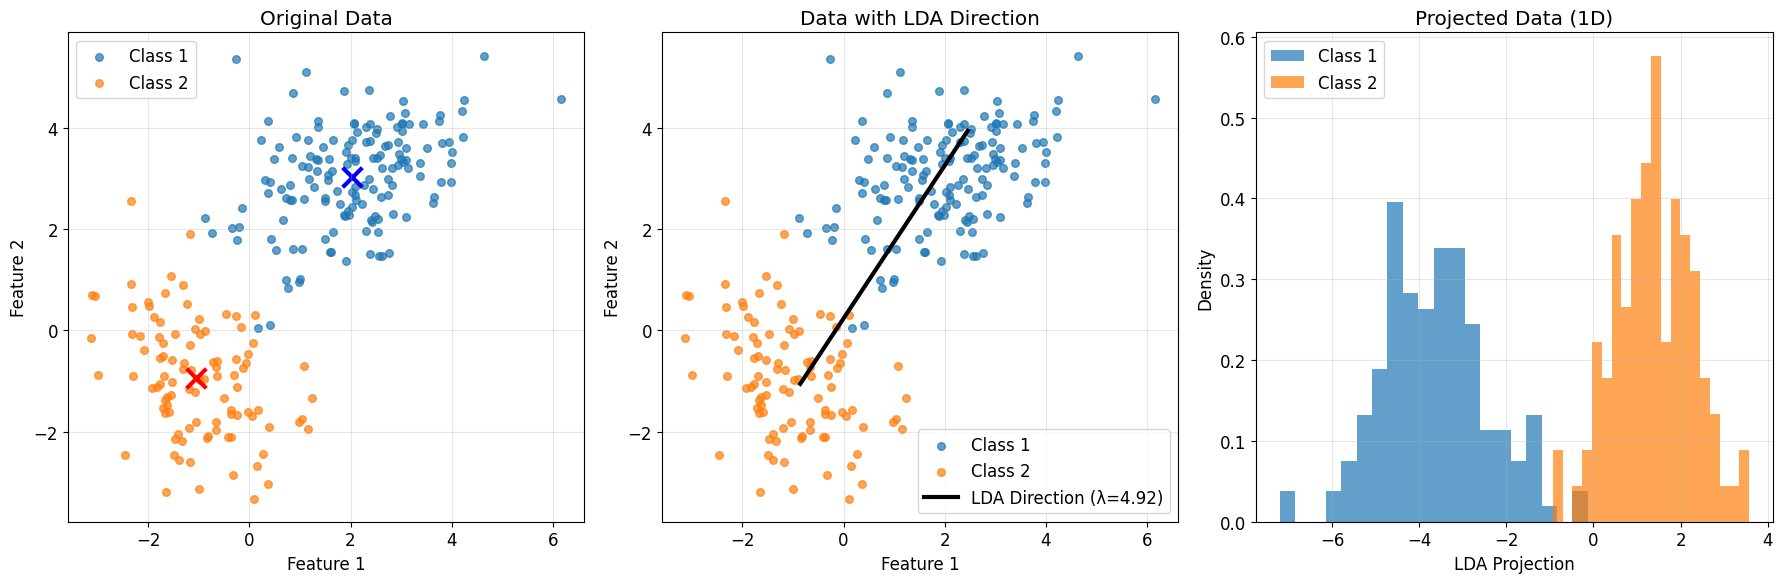


📊 LDA Performance:
  Class separation (Fisher ratio): 10.895
  Higher is better for classification


In [11]:
def demonstrate_lda_with_generalized_eigen():
    """Implement Linear Discriminant Analysis using generalized eigendecomposition"""

    # Create a 2-class classification dataset
    np.random.seed(42)

    # Class 1: centered at (2, 3)
    n1 = 150
    class1 = np.random.multivariate_normal([2, 3], [[1.5, 0.5], [0.5, 1.0]], n1)

    # Class 2: centered at (-1, -1)
    n2 = 100
    class2 = np.random.multivariate_normal([-1, -1], [[1.0, -0.3], [-0.3, 1.2]], n2)

    # Combine data
    X = np.vstack([class1, class2])
    y = np.hstack([np.zeros(n1), np.ones(n2)])

    print("🎯 Linear Discriminant Analysis (LDA)")
    print("=" * 50)
    print(f"Class 1 samples: {n1}")
    print(f"Class 2 samples: {n2}")
    print(f"Feature dimension: {X.shape[1]}")

    # Step 1: Compute class means
    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)
    overall_mean = np.mean(X, axis=0)

    print(f"\nClass means:")
    print(f"  Class 1: {mean1}")
    print(f"  Class 2: {mean2}")
    print(f"  Overall: {overall_mean}")

    # Step 2: Compute scatter matrices
    # Within-class scatter matrix (Sw)
    S1 = (class1 - mean1).T @ (class1 - mean1)
    S2 = (class2 - mean2).T @ (class2 - mean2)
    Sw = S1 + S2

    # Between-class scatter matrix (Sb)
    Sb = n1 * np.outer(mean1 - overall_mean, mean1 - overall_mean) + \
         n2 * np.outer(mean2 - overall_mean, mean2 - overall_mean)

    print(f"\nScatter matrices:")
    print(f"  Within-class Sw:\n{Sw}")
    print(f"  Between-class Sb:\n{Sb}")

    # Step 3: Solve generalized eigenvalue problem Sb v = λ Sw v
    # This is equivalent to Sw^(-1) Sb v = λ v
    try:
        Sw_inv = np.linalg.inv(Sw)
        eigenvals, eigenvecs = np.linalg.eig(Sw_inv @ Sb)

        # Sort by eigenvalue (descending)
        idx = np.argsort(eigenvals.real)[::-1]
        eigenvals = eigenvals[idx].real
        eigenvecs = eigenvecs[:, idx].real

        print(f"\nLDA Results:")
        print(f"  Eigenvalues: {eigenvals}")
        print(f"  Discriminant directions:\n{eigenvecs}")

        # Project data onto discriminant direction
        lda_direction = eigenvecs[:, 0]  # First (most discriminative) direction
        X_lda = X @ lda_direction

        # Visualization
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Original data
        axes[0].scatter(class1[:, 0], class1[:, 1], alpha=0.7, label='Class 1', s=30)
        axes[0].scatter(class2[:, 0], class2[:, 1], alpha=0.7, label='Class 2', s=30)
        axes[0].scatter([mean1[0]], [mean1[1]], marker='x', s=200, color='blue', linewidth=3)
        axes[0].scatter([mean2[0]], [mean2[1]], marker='x', s=200, color='red', linewidth=3)
        axes[0].set_xlabel('Feature 1')
        axes[0].set_ylabel('Feature 2')
        axes[0].set_title('Original Data')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[0].axis('equal')

        # With LDA direction
        axes[1].scatter(class1[:, 0], class1[:, 1], alpha=0.7, label='Class 1', s=30)
        axes[1].scatter(class2[:, 0], class2[:, 1], alpha=0.7, label='Class 2', s=30)

        # Plot LDA direction
        center = overall_mean
        lda_line = np.array([center - 3*lda_direction, center + 3*lda_direction])
        axes[1].plot(lda_line[:, 0], lda_line[:, 1], 'k-', linewidth=3,
                    label=f'LDA Direction (λ={eigenvals[0]:.2f})')
        axes[1].set_xlabel('Feature 1')
        axes[1].set_ylabel('Feature 2')
        axes[1].set_title('Data with LDA Direction')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        axes[1].axis('equal')

        # Projected data (1D)
        X1_proj = X_lda[y == 0]
        X2_proj = X_lda[y == 1]

        axes[2].hist(X1_proj, bins=20, alpha=0.7, label='Class 1', density=True)
        axes[2].hist(X2_proj, bins=20, alpha=0.7, label='Class 2', density=True)
        axes[2].set_xlabel('LDA Projection')
        axes[2].set_ylabel('Density')
        axes[2].set_title('Projected Data (1D)')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Calculate separation metric
        mean1_proj = np.mean(X1_proj)
        mean2_proj = np.mean(X2_proj)
        var1_proj = np.var(X1_proj)
        var2_proj = np.var(X2_proj)

        fisher_ratio = (mean1_proj - mean2_proj)**2 / (var1_proj + var2_proj)

        print(f"\n📊 LDA Performance:")
        print(f"  Class separation (Fisher ratio): {fisher_ratio:.3f}")
        print(f"  Higher is better for classification")

    except np.linalg.LinAlgError:
        print("❌ Sw matrix is singular - cannot compute LDA")
        return None

# Execute LDA demonstration
demonstrate_lda_with_generalized_eigen()


# PRODUCTION: COMPUTATIONAL CONSIDERATIONS FOR INDUSTRY

## ⚡ Production-Ready Eigendecomposition

**Performance Optimization Strategies:**
1. **Sparse Matrices**: Use scipy.sparse for memory efficiency
2. **Partial Eigendecomposition**: Only compute top-k eigenvalues/vectors
3. **Randomized Methods**: Faster approximate solutions for large matrices
4. **GPU Acceleration**: CuPy/JAX for massive parallel computation
5. **Distributed Computing**: Spark MLlib for cluster-scale problems

**Numerical Stability:**
- **Condition Number**: Monitor for ill-conditioned matrices
- **Regularization**: Add small values to diagonal for stability
- **Iterative Refinement**: Improve accuracy of solutions
- **Double Precision**: Use float64 for critical applications

**Memory Management:**
- **In-place Operations**: Reduce memory allocation overhead
- **Chunked Processing**: Handle matrices larger than RAM
- **Memory Mapping**: Process huge datasets from disk
- **Garbage Collection**: Proper cleanup in long-running services

**Real-World Deployment:**
- **Model Versioning**: Track eigendecomposition parameters
- **A/B Testing**: Compare different dimensionality reduction strategies
- **Monitoring**: Watch for numerical instabilities in production
- **Fallback Strategies**: Handle edge cases gracefully

⚡ Production Eigendecomposition Benchmark

📊 Testing 100×100 matrices:
  NumPy Full: 0.215s
  SciPy Sparse (top-10): 0.038s
  Randomized SVD: 0.022s
  Power Iteration (largest): 0.001s

📊 Testing 500×500 matrices:
  NumPy Full: 3.125s
  SciPy Sparse (top-10): 0.191s
  Randomized SVD: 0.196s
  Power Iteration (largest): 0.018s

📊 Testing 1000×1000 matrices:
  NumPy Full: 6.781s
  SciPy Sparse (top-10): 0.576s
  Randomized SVD: 0.991s
  Power Iteration (largest): 0.210s

📊 Testing 2000×2000 matrices:
  NumPy Full: 19.332s
  SciPy Sparse (top-10): 1.848s
  Randomized SVD: 1.067s
  Power Iteration (largest): 0.346s


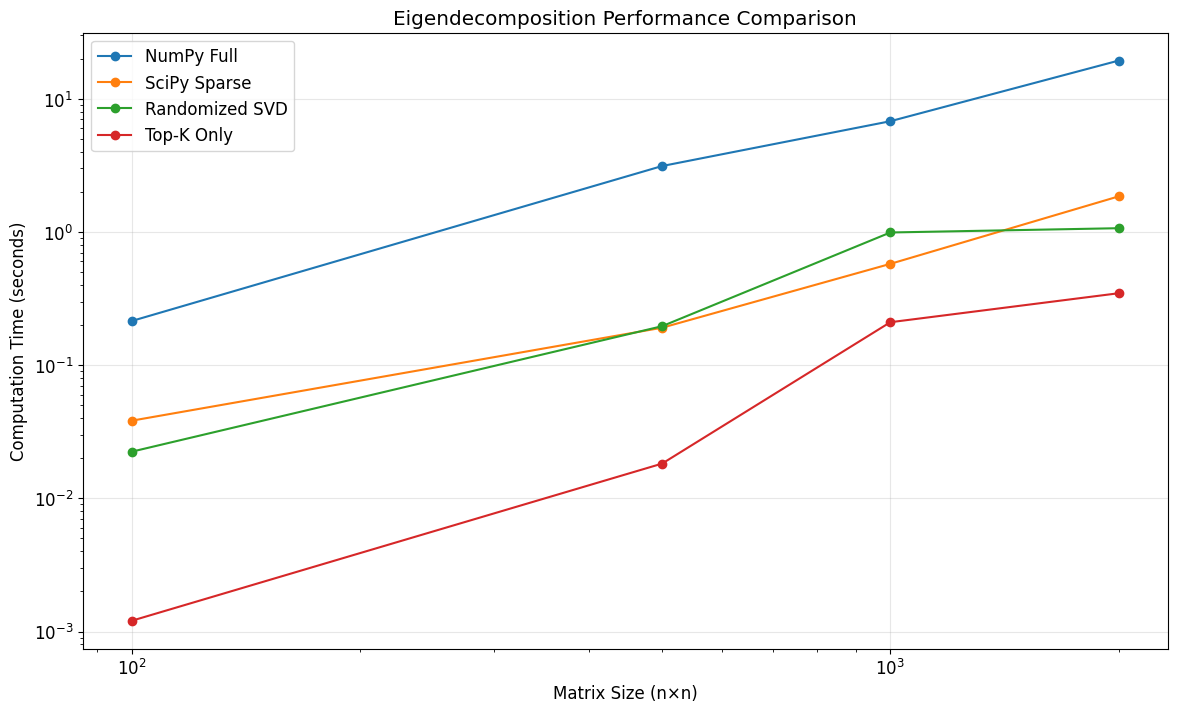


💾 Memory Usage Analysis:
   Dense 2000×2000 matrix: 30.5 MB
   Sparse matrix (10% density): 3.1 MB
   Eigendecomposition workspace: ~91.6 MB

🎯 Production Recommendations:
📏 Small matrices (n < 1000): NumPy full eigendecomposition
🗜️  Sparse matrices: scipy.sparse.linalg.eigsh
⚡ Large dense matrices: Randomized SVD for top components
🎯 Single eigenvalue: Power iteration
🚀 GPU acceleration: Use CuPy for matrices > 5000×5000
⚠️  Numerical Stability in Eigendecomposition

1. 🔥 Ill-Conditioned Matrix Problem:
   True condition number: 1.00e+10
   Computed condition number: 1.00e+10
   Relative error in smallest eigenvalue: 1.17e-07

2. ⚠️  Nearly Singular Matrix (common in PCA):
   Covariance matrix eigenvalue range: 5.030 to -1.06e-15
   Effective rank: 6/9
   After regularization: 5.030 to 1.00e-06


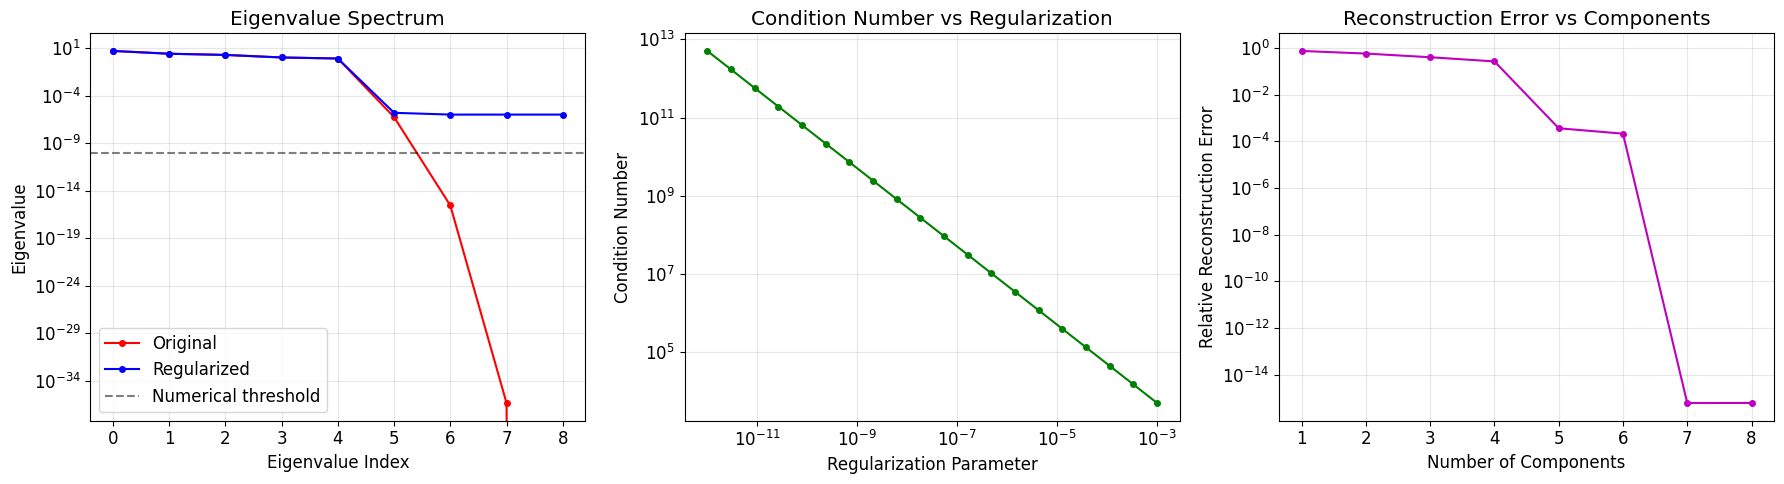


✅ Best Practices for Numerical Stability:
   1. Check condition number before eigendecomposition
   2. Use regularization for nearly singular matrices
   3. Use SVD instead of eigendecomposition of A^T A
   4. Monitor eigenvalue magnitudes in production
   5. Use double precision (float64) for critical applications


In [12]:
def benchmark_eigendecomposition_methods():
    """Benchmark different eigendecomposition approaches for production use"""

    import time
    from scipy import sparse
    from sklearn.utils.extmath import randomized_svd

    print("⚡ Production Eigendecomposition Benchmark")
    print("=" * 60)

    # Test different matrix sizes
    sizes = [100, 500, 1000, 2000]
    methods_results = {
        'NumPy Full': [],
        'SciPy Sparse': [],
        'Randomized SVD': [],
        'Top-K Only': []
    }

    for n in sizes:
        print(f"\n📊 Testing {n}×{n} matrices:")

        # Create test matrices
        np.random.seed(42)

        # Dense matrix
        A_dense = np.random.randn(n, n)
        A_dense = A_dense.T @ A_dense  # Make it symmetric positive definite

        # Sparse matrix (common in real applications)
        A_sparse = sparse.random(n, n, density=0.1, format='csr')
        A_sparse = A_sparse.T @ A_sparse
        A_sparse = A_sparse.tocsr()

        # Method 1: NumPy full eigendecomposition
        start_time = time.time()
        eigenvals_numpy, _ = np.linalg.eig(A_dense)
        time_numpy = time.time() - start_time
        methods_results['NumPy Full'].append(time_numpy)
        print(f"  NumPy Full: {time_numpy:.3f}s")

        # Method 2: SciPy sparse (top-k eigenvalues)
        try:
            from scipy.sparse.linalg import eigsh
            k = min(10, n-2)  # Top 10 eigenvalues
            start_time = time.time()
            eigenvals_sparse, _ = eigsh(A_sparse, k=k, which='LA')
            time_sparse = time.time() - start_time
            methods_results['SciPy Sparse'].append(time_sparse)
            print(f"  SciPy Sparse (top-{k}): {time_sparse:.3f}s")
        except Exception as e:
            print(f"  SciPy Sparse: Failed ({e})")
            methods_results['SciPy Sparse'].append(np.nan)

        # Method 3: Randomized SVD (approximate)
        start_time = time.time()
        U, s, Vt = randomized_svd(A_dense, n_components=min(10, n), random_state=42)
        time_randomized = time.time() - start_time
        methods_results['Randomized SVD'].append(time_randomized)
        print(f"  Randomized SVD: {time_randomized:.3f}s")

        # Method 4: Power iteration for largest eigenvalue only
        start_time = time.time()
        largest_eigenval, _, _ = power_iteration(A_dense, num_iterations=50)
        time_power = time.time() - start_time
        methods_results['Top-K Only'].append(time_power)
        print(f"  Power Iteration (largest): {time_power:.3f}s")

    # Visualize benchmark results
    plt.figure(figsize=(14, 8))

    for method, times in methods_results.items():
        valid_times = [t for t in times if not np.isnan(t)]
        valid_sizes = [sizes[i] for i, t in enumerate(times) if not np.isnan(t)]

        if valid_times:
            plt.loglog(valid_sizes, valid_times, 'o-', label=method, markersize=6)

    plt.xlabel('Matrix Size (n×n)')
    plt.ylabel('Computation Time (seconds)')
    plt.title('Eigendecomposition Performance Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Memory usage analysis
    print(f"\n💾 Memory Usage Analysis:")
    print(f"   Dense {sizes[-1]}×{sizes[-1]} matrix: {sizes[-1]**2 * 8 / 1024**2:.1f} MB")
    print(f"   Sparse matrix (10% density): {sizes[-1]**2 * 0.1 * 8 / 1024**2:.1f} MB")
    print(f"   Eigendecomposition workspace: ~{3 * sizes[-1]**2 * 8 / 1024**2:.1f} MB")

    # Recommendations
    print(f"\n🎯 Production Recommendations:")
    print(f"=" * 40)
    print(f"📏 Small matrices (n < 1000): NumPy full eigendecomposition")
    print(f"🗜️  Sparse matrices: scipy.sparse.linalg.eigsh")
    print(f"⚡ Large dense matrices: Randomized SVD for top components")
    print(f"🎯 Single eigenvalue: Power iteration")
    print(f"🚀 GPU acceleration: Use CuPy for matrices > 5000×5000")

def demonstrate_numerical_stability():
    """Show common numerical stability issues and solutions"""

    print("⚠️  Numerical Stability in Eigendecomposition")
    print("=" * 50)

    # Issue 1: Ill-conditioned matrices
    print("\n1. 🔥 Ill-Conditioned Matrix Problem:")

    # Create an ill-conditioned matrix
    U = np.random.randn(50, 50)
    Q, _ = np.linalg.qr(U)  # Orthogonal matrix

    # Eigenvalues with huge range
    eigenvals_true = np.logspace(0, -10, 50)  # From 1 to 1e-10
    A_illconditioned = Q @ np.diag(eigenvals_true) @ Q.T

    # Compute eigendecomposition
    eigenvals_computed, _ = np.linalg.eig(A_illconditioned)
    eigenvals_computed = np.sort(eigenvals_computed.real)[::-1]

    condition_number = np.max(eigenvals_computed) / np.min(eigenvals_computed[eigenvals_computed > 1e-15])

    print(f"   True condition number: {np.max(eigenvals_true) / np.min(eigenvals_true):.2e}")
    print(f"   Computed condition number: {condition_number:.2e}")
    print(f"   Relative error in smallest eigenvalue: {abs(eigenvals_computed[-1] - eigenvals_true[-1]) / eigenvals_true[-1]:.2e}")

    # Issue 2: Nearly singular matrices
    print(f"\n2. ⚠️  Nearly Singular Matrix (common in PCA):")

    # Create data with redundant features
    n_samples, n_features = 100, 20
    X_base = np.random.randn(n_samples, 5)
    # Add redundant features (linear combinations)
    X_redundant = np.column_stack([
        X_base,
        X_base[:, 0] + 0.001 * np.random.randn(n_samples),  # Nearly identical to first
        X_base[:, 1] - X_base[:, 2],  # Linear combination
        np.ones(n_samples) * 0.001,  # Nearly constant
        X_base.sum(axis=1)  # Sum of other features
    ])

    # Covariance matrix will be nearly singular
    cov_matrix = np.cov(X_redundant.T)
    eigenvals_cov, _ = np.linalg.eig(cov_matrix)
    eigenvals_cov = np.sort(eigenvals_cov.real)[::-1]

    print(f"   Covariance matrix eigenvalue range: {eigenvals_cov[0]:.3f} to {eigenvals_cov[-1]:.2e}")
    print(f"   Effective rank: {np.sum(eigenvals_cov > 1e-10)}/{len(eigenvals_cov)}")

    # Solution: Regularization
    regularized_cov = cov_matrix + 1e-6 * np.eye(cov_matrix.shape[0])
    eigenvals_reg, _ = np.linalg.eig(regularized_cov)
    eigenvals_reg = np.sort(eigenvals_reg.real)[::-1]

    print(f"   After regularization: {eigenvals_reg[0]:.3f} to {eigenvals_reg[-1]:.2e}")

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Eigenvalue spectrum comparison
    axes[0].semilogy(range(len(eigenvals_cov)), eigenvals_cov, 'ro-',
                     label='Original', markersize=4)
    axes[0].semilogy(range(len(eigenvals_reg)), eigenvals_reg, 'bo-',
                     label='Regularized', markersize=4)
    axes[0].axhline(y=1e-10, color='k', linestyle='--', alpha=0.5, label='Numerical threshold')
    axes[0].set_xlabel('Eigenvalue Index')
    axes[0].set_ylabel('Eigenvalue')
    axes[0].set_title('Eigenvalue Spectrum')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Condition number vs regularization
    reg_params = np.logspace(-12, -3, 20)
    condition_numbers = []

    for reg in reg_params:
        reg_cov = cov_matrix + reg * np.eye(cov_matrix.shape[0])
        eigs = np.linalg.eigvals(reg_cov).real
        cond_num = np.max(eigs) / np.min(eigs)
        condition_numbers.append(cond_num)

    axes[1].loglog(reg_params, condition_numbers, 'g-o', markersize=4)
    axes[1].set_xlabel('Regularization Parameter')
    axes[1].set_ylabel('Condition Number')
    axes[1].set_title('Condition Number vs Regularization')
    axes[1].grid(True, alpha=0.3)

    # Reconstruction error vs components
    U_svd, s_svd, Vt_svd = np.linalg.svd(X_redundant, full_matrices=False)

    reconstruction_errors = []
    n_components_range = range(1, min(15, len(s_svd)))

    for k in n_components_range:
        X_reconstructed = U_svd[:, :k] @ np.diag(s_svd[:k]) @ Vt_svd[:k, :]
        error = np.linalg.norm(X_redundant - X_reconstructed, 'fro') / np.linalg.norm(X_redundant, 'fro')
        reconstruction_errors.append(error)

    axes[2].semilogy(n_components_range, reconstruction_errors, 'mo-', markersize=4)
    axes[2].set_xlabel('Number of Components')
    axes[2].set_ylabel('Relative Reconstruction Error')
    axes[2].set_title('Reconstruction Error vs Components')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Best practices
    print(f"\n✅ Best Practices for Numerical Stability:")
    print(f"   1. Check condition number before eigendecomposition")
    print(f"   2. Use regularization for nearly singular matrices")
    print(f"   3. Use SVD instead of eigendecomposition of A^T A")
    print(f"   4. Monitor eigenvalue magnitudes in production")
    print(f"   5. Use double precision (float64) for critical applications")

# Execute benchmarks and stability analysis
benchmark_eigendecomposition_methods()
demonstrate_numerical_stability()


# REAL-TIME APPLICATION: COMPUTER VISION PIPELINE

## 📹 Real-Time Computer Vision with Eigendecomposition

**Video Processing Pipeline Applications:**
1. **Background Subtraction**: PCA for background modeling
2. **Motion Tracking**: Eigendecomposition of optical flow
3. **Object Recognition**: Real-time PCA feature extraction
4. **Video Compression**: KLT (Karhunen-Loeve Transform)
5. **Activity Recognition**: Temporal eigenanalysis

**Production Constraints:**
- **Latency**: <33ms for 30fps processing
- **Memory**: Limited GPU memory for mobile devices
- **Throughput**: Process multiple video streams
- **Accuracy**: Balance speed vs quality

**Industry Applications:**
- **Security Systems**: Real-time person detection and tracking
- **Autonomous Vehicles**: Lane detection and obstacle tracking
- **Augmented Reality**: Face tracking for filters
- **Sports Analytics**: Player tracking and performance analysis

📹 Real-Time PCA Video Processing Simulation
Video specs: 64×64, 200 frames
Data rate: 0.8 MB

⚡ Processing 200 frames in batches of 10:
  Batch 1: 82299.6ms, Error: 0.000
  Batch 6: 299.3ms, Error: 8.938
  Batch 11: 512.6ms, Error: 9.243
  Batch 16: 293.5ms, Error: 9.753


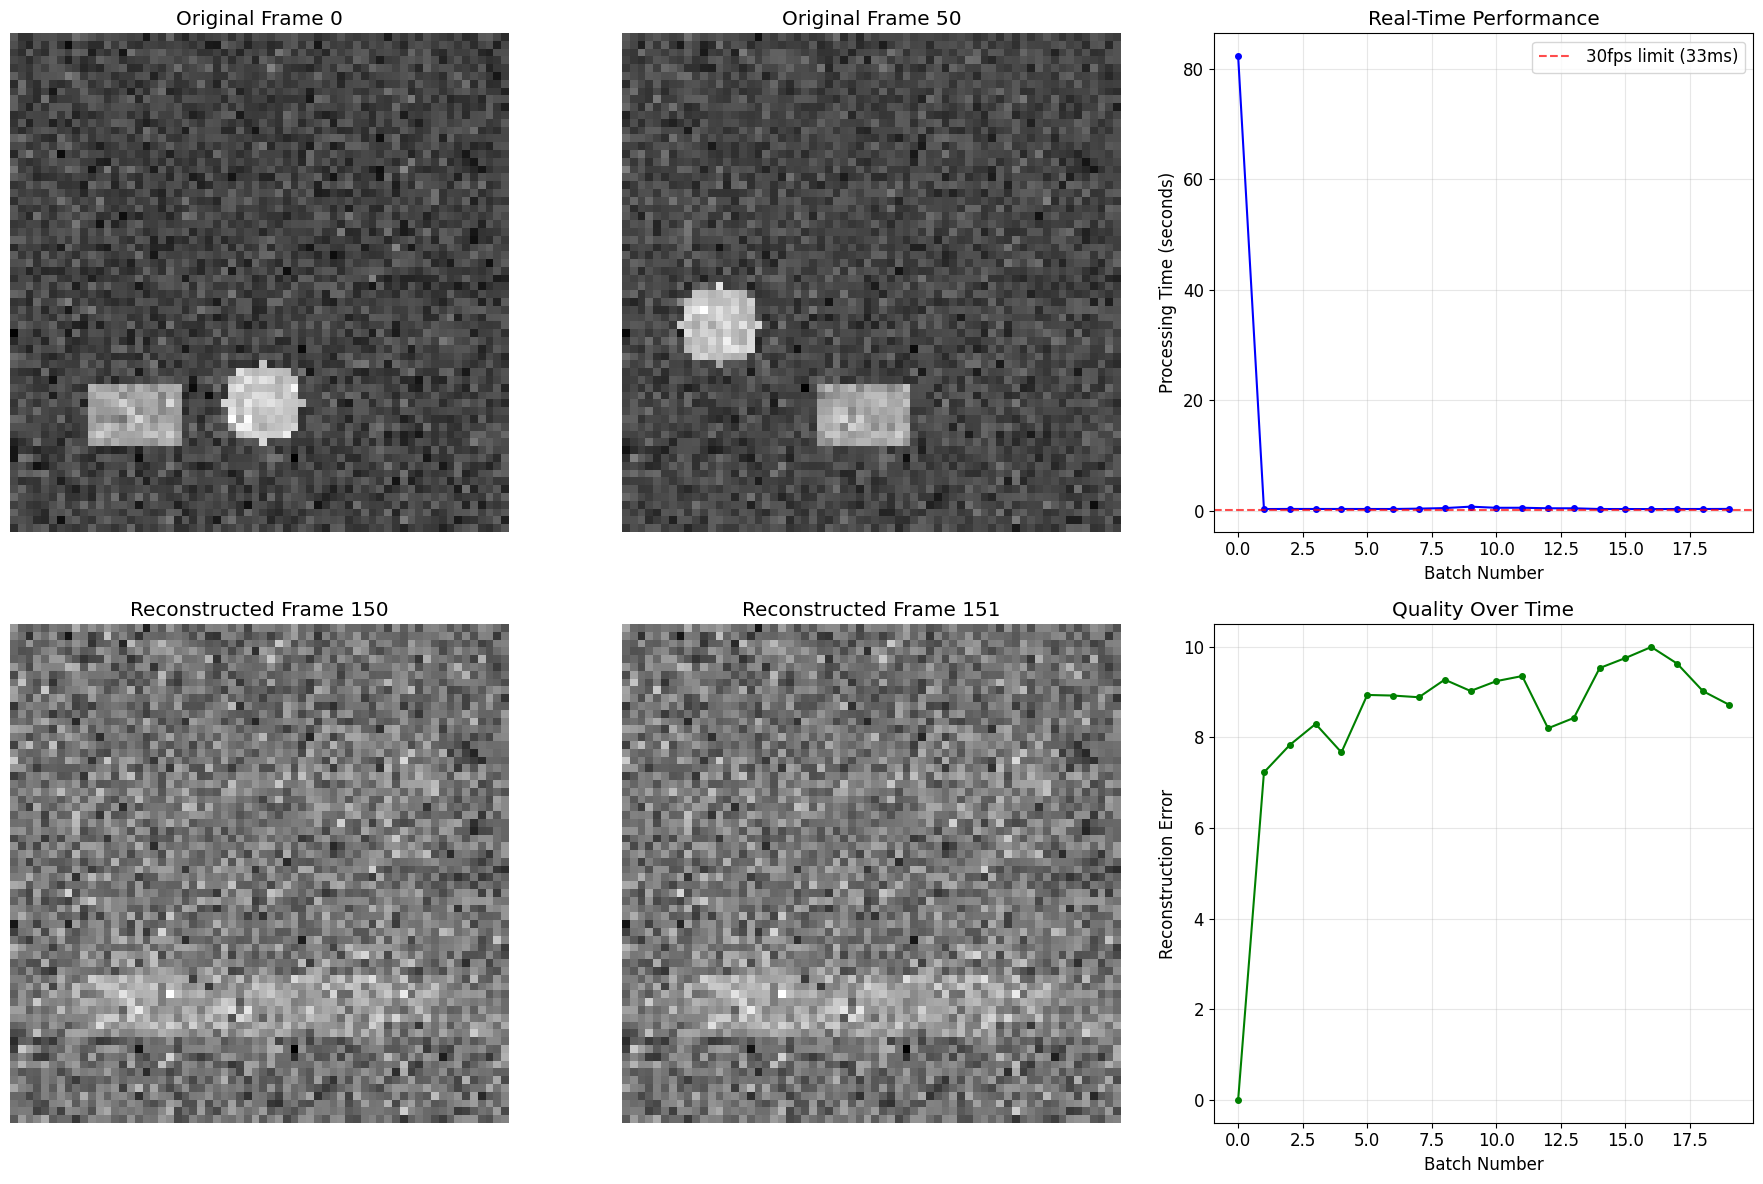


📊 Performance Analysis:
   Average processing time: 4464.8ms per batch
   Theoretical max FPS: 0.2
   Memory usage: 640.0 KB for model
   Compression ratio: 204.8:1


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time  # 추가된 import

def create_realtime_pca_demo():
    """Simulate real-time PCA for video processing"""

    print("📹 Real-Time PCA Video Processing Simulation")
    print("=" * 50)

    # Simulate video frames (64x64 grayscale images)
    frame_height, frame_width = 64, 64
    n_frames = 200
    n_pixels = frame_height * frame_width

    print(f"Video specs: {frame_height}×{frame_width}, {n_frames} frames")
    print(f"Data rate: {n_pixels * n_frames * 1 / 1024**2:.1f} MB")

    # Generate synthetic video with moving objects
    frames = []
    background = np.random.randn(frame_height, frame_width) * 0.1  # Static background

    for i in range(n_frames):
        # Moving object (circle)
        frame = background.copy()

        # Object 1: Moving circle
        center_x = int(32 + 20 * np.sin(i * 0.1))
        center_y = int(32 + 15 * np.cos(i * 0.15))

        y, x = np.ogrid[:frame_height, :frame_width]
        mask = (x - center_x)**2 + (y - center_y)**2 <= 5**2
        frame[mask] += 0.8

        # Object 2: Moving rectangle
        rect_x = int(10 + i * 0.3) % (frame_width - 10)
        rect_y = int(45)
        frame[rect_y:rect_y+8, rect_x:rect_x+12] += 0.6

        # Add noise
        frame += np.random.randn(frame_height, frame_width) * 0.05

        frames.append(frame.flatten())

    frames = np.array(frames)  # Shape: (n_frames, n_pixels)

    # Online PCA implementation (incremental)
    class OnlinePCA:
        def __init__(self, n_components=10):
            self.n_components = n_components
            self.n_samples_seen = 0
            self.mean = None
            self.components = None
            self.eigenvalues = None

        def partial_fit(self, X_batch):
            """Update PCA with new batch of data"""
            if self.mean is None:
                # Initialize
                self.mean = np.mean(X_batch, axis=0)
                X_centered = X_batch - self.mean

                # Use SVD for initial estimate
                U, s, Vt = np.linalg.svd(X_centered.T @ X_centered / (X_batch.shape[0] - 1),
                                        full_matrices=False)
                self.components = U[:, :self.n_components]
                self.eigenvalues = s[:self.n_components]
                self.n_samples_seen = X_batch.shape[0]
            else:
                # Incremental update (simplified version)
                batch_size = X_batch.shape[0]

                # Update mean
                total_samples = self.n_samples_seen + batch_size
                new_mean = (self.n_samples_seen * self.mean +
                           batch_size * np.mean(X_batch, axis=0)) / total_samples

                # Center data with old mean
                X_centered_old = X_batch - self.mean

                # Quick covariance update (approximate)
                batch_cov = X_centered_old.T @ X_centered_old / batch_size

                # Simple eigenvalue update (in practice, use more sophisticated methods)
                new_eigenvals, new_components = np.linalg.eig(
                    0.9 * np.diag(self.eigenvalues) + 0.1 * self.components.T @ batch_cov @ self.components
                )

                # Keep top components
                idx = np.argsort(new_eigenvals.real)[::-1][:self.n_components]
                self.eigenvalues = new_eigenvals[idx].real
                self.components = self.components @ new_components[:, idx].real

                self.mean = new_mean
                self.n_samples_seen = total_samples

        def transform(self, X):
            """Project data onto principal components"""
            if self.mean is None:
                raise ValueError("Model not fitted yet")
            return (X - self.mean) @ self.components

        def inverse_transform(self, X_pca):
            """Reconstruct data from PCA representation"""
            return X_pca @ self.components.T + self.mean

    # Simulate real-time processing
    online_pca = OnlinePCA(n_components=20)
    batch_size = 10

    processing_times = []
    reconstruction_errors = []

    print(f"\n⚡ Processing {n_frames} frames in batches of {batch_size}:")

    for i in range(0, n_frames, batch_size):
        batch = frames[i:i+batch_size]

        # Time the processing
        start_time = time.time()

        # Update PCA model
        online_pca.partial_fit(batch)

        # Transform and reconstruct
        X_pca = online_pca.transform(batch)
        X_reconstructed = online_pca.inverse_transform(X_pca)

        processing_time = time.time() - start_time
        processing_times.append(processing_time)

        # Calculate reconstruction error
        error = np.mean(np.linalg.norm(batch - X_reconstructed, axis=1))
        reconstruction_errors.append(error)

        if (i // batch_size) % 5 == 0:
            print(f"  Batch {i//batch_size + 1}: {processing_time*1000:.1f}ms, Error: {error:.3f}")

    # Visualize results
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Original frames
    sample_indices = [0, 50, 100, 150]
    for i, idx in enumerate(sample_indices[:2]):
        axes[0, i].imshow(frames[idx].reshape(frame_height, frame_width), cmap='gray')
        axes[0, i].set_title(f'Original Frame {idx}')
        axes[0, i].axis('off')

    # Reconstructed frames
    final_X_pca = online_pca.transform(frames[150:154])
    final_reconstructed = online_pca.inverse_transform(final_X_pca)

    for i, idx in enumerate([0, 1]):
        axes[1, i].imshow(final_reconstructed[idx].reshape(frame_height, frame_width), cmap='gray')
        axes[1, i].set_title(f'Reconstructed Frame {150 + idx}')
        axes[1, i].axis('off')

    # Processing time analysis
    axes[0, 2].plot(processing_times, 'b-o', markersize=4)
    axes[0, 2].axhline(y=0.033, color='r', linestyle='--', alpha=0.7, label='30fps limit (33ms)')
    axes[0, 2].set_xlabel('Batch Number')
    axes[0, 2].set_ylabel('Processing Time (seconds)')
    axes[0, 2].set_title('Real-Time Performance')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # Reconstruction error over time
    axes[1, 2].plot(reconstruction_errors, 'g-o', markersize=4)
    axes[1, 2].set_xlabel('Batch Number')
    axes[1, 2].set_ylabel('Reconstruction Error')
    axes[1, 2].set_title('Quality Over Time')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Performance analysis
    avg_processing_time = np.mean(processing_times) * 1000
    max_fps = 1000 / avg_processing_time if avg_processing_time > 0 else float('inf')

    print(f"\n📊 Performance Analysis:")
    print(f"   Average processing time: {avg_processing_time:.1f}ms per batch")
    print(f"   Theoretical max FPS: {max_fps:.1f}")
    print(f"   Memory usage: {online_pca.components.nbytes / 1024:.1f} KB for model")
    print(f"   Compression ratio: {n_pixels / online_pca.n_components:.1f}:1")

    return frames, online_pca, processing_times, reconstruction_errors

# Execute real-time demo
video_frames, pca_model, proc_times, recon_errors = create_realtime_pca_demo()

# INTERVIEW PREP: EIGENDECOMPOSITION QUESTIONS FOR AI ENGINEERS

## 🎯 Technical Interview Questions & Answers

**Common Questions You'll Face:**

### Q1: "Explain eigendecomposition vs SVD - when would you use each?"

**Answer Strategy:**
- Start with mathematical definitions
- Give concrete examples from computer vision
- Discuss computational trade-offs
- Mention production considerations

### Q2: "How would you implement PCA for a streaming video application?"

**Answer Strategy:**
- Mention incremental PCA algorithms
- Discuss memory constraints
- Talk about real-time performance requirements
- Suggest alternative approaches (randomized PCA)

### Q3: "What are the stability issues with eigendecomposition and how do you handle them?"

**Answer Strategy:**
- Discuss ill-conditioned matrices
- Mention regularization techniques
- Talk about numerical precision
- Give real-world examples

### Q4: "How does eigendecomposition relate to neural network training?"

**Answer Strategy:**
- Discuss Hessian eigenvalues and convergence
- Mention weight matrix analysis
- Talk about gradient flow and vanishing gradients
- Connect to modern architectures

**Technical Deep-Dive Questions:**

In [14]:
def create_interview_qa_system():
    """Interactive Q&A system for interview preparation"""

    qa_database = {
        "mathematical": [
            {
                "question": "What's the relationship between eigenvalues of A and A^(-1)?",
                "answer": "If λ is an eigenvalue of A, then 1/λ is an eigenvalue of A^(-1). The eigenvectors remain the same.",
                "code_demo": "demonstrate_inverse_eigenvalues",
                "industry_relevance": "Important for understanding optimization algorithms and matrix conditioning."
            },
            {
                "question": "Why might PCA fail and what are the alternatives?",
                "answer": "PCA assumes linear relationships. For non-linear data, use kernel PCA, t-SNE, or autoencoders.",
                "code_demo": "demonstrate_pca_limitations",
                "industry_relevance": "Critical for data preprocessing in deep learning pipelines."
            }
        ],
        "computational": [
            {
                "question": "How would you compute eigendecomposition for a 100GB matrix?",
                "answer": "Use distributed computing (Spark), out-of-core algorithms, or approximate methods like randomized SVD.",
                "code_demo": "demonstrate_large_scale_eigen",
                "industry_relevance": "Essential for big data applications at companies like Google, Facebook."
            },
            {
                "question": "What's the computational complexity of eigendecomposition?",
                "answer": "O(n³) for dense matrices, but can be reduced to O(n²k) for top-k eigenvalues using iterative methods.",
                "code_demo": "demonstrate_complexity_analysis",
                "industry_relevance": "Important for algorithm selection in production systems."
            }
        ],
        "applications": [
            {
                "question": "How would you use eigendecomposition for recommendation systems?",
                "answer": "Use SVD for matrix factorization to find latent factors in user-item interactions.",
                "code_demo": "demonstrate_recommendation_svd",
                "industry_relevance": "Core technology at Netflix, Amazon, Spotify for personalization."
            },
            {
                "question": "Explain how Google's PageRank uses eigendecomposition.",
                "answer": "PageRank finds the dominant eigenvector of the web link matrix using power iteration.",
                "code_demo": "demonstrate_pagerank",
                "industry_relevance": "Foundation of Google's search algorithm and graph analysis."
            }
        ]
    }

    def demonstrate_inverse_eigenvalues():
        """Show relationship between eigenvalues of A and A^(-1)"""
        A = np.array([[3, 1], [0, 2]])
        eigenvals_A, eigenvecs_A = np.linalg.eig(A)

        A_inv = np.linalg.inv(A)
        eigenvals_Ainv, eigenvecs_Ainv = np.linalg.eig(A_inv)

        print("Matrix A eigenvalues:", eigenvals_A)
        print("Matrix A^(-1) eigenvalues:", eigenvals_Ainv)
        print("Reciprocal check:", 1/eigenvals_A)
        print("✅ Relationship verified: λ(A^(-1)) = 1/λ(A)")

    def demonstrate_pca_limitations():
        """Show when PCA fails and alternatives work better"""
        # Create non-linear data (Swiss roll)
        from sklearn.datasets import make_swiss_roll
        X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

        # Apply PCA
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        # Apply t-SNE
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        X_tsne = tsne.fit_transform(X)

        # Visualize
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Original 3D data (projected to 2D for visualization)
        axes[0].scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
        axes[0].set_title('Original Data (X-Y view)')

        # PCA result
        axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
        axes[1].set_title('PCA (Linear Projection)')

        # t-SNE result
        axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
        axes[2].set_title('t-SNE (Non-linear Projection)')

        plt.tight_layout()
        plt.show()

        print("💡 PCA fails to preserve the intrinsic structure of non-linear manifolds")
        print("✅ t-SNE preserves local neighborhoods and reveals the true structure")

    def demonstrate_recommendation_svd():
        """Show SVD for collaborative filtering"""
        # Create synthetic user-movie rating matrix
        np.random.seed(42)
        n_users, n_movies = 100, 50

        # Generate latent factors
        n_factors = 5
        user_factors = np.random.randn(n_users, n_factors)
        movie_factors = np.random.randn(n_factors, n_movies)

        # True ratings
        ratings_true = user_factors @ movie_factors

        # Observed ratings (with missing values)
        mask = np.random.rand(n_users, n_movies) > 0.7  # 30% observed
        ratings_observed = ratings_true.copy()
        ratings_observed[~mask] = 0

        # Apply SVD for matrix completion
        U, s, Vt = np.linalg.svd(ratings_observed, full_matrices=False)

        # Reconstruct with top factors
        k = 10  # Number of factors to keep
        ratings_reconstructed = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

        # Calculate RMSE on observed entries
        rmse_observed = np.sqrt(np.mean((ratings_observed[mask] - ratings_reconstructed[mask])**2))
        rmse_true = np.sqrt(np.mean((ratings_true[mask] - ratings_reconstructed[mask])**2))

        print(f"Recommendation System SVD Results:")
        print(f"  Observed entries: {np.sum(mask)} / {n_users * n_movies} ({np.sum(mask)/(n_users*n_movies)*100:.1f}%)")
        print(f"  RMSE on observed entries: {rmse_observed:.3f}")
        print(f"  RMSE vs true ratings: {rmse_true:.3f}")
        print(f"  Compression: {n_users * n_movies} → {k * (n_users + n_movies)} parameters")

    def demonstrate_pagerank():
        """Demonstrate PageRank using eigendecomposition"""
        # Create a simple web graph
        # Nodes: A, B, C, D
        # Links: A→B,C; B→C; C→A,D; D→A,B

        # Adjacency matrix (who links to whom)
        links = np.array([
            [0, 1, 1, 0],  # A links to B, C
            [0, 0, 1, 0],  # B links to C
            [1, 0, 0, 1],  # C links to A, D
            [1, 1, 0, 0]   # D links to A, B
        ])

        # Create transition matrix (column stochastic)
        out_degree = np.sum(links, axis=1)
        transition_matrix = links.T / out_degree[np.newaxis, :]

        # Add damping factor (random jump probability)
        damping = 0.85
        n = len(transition_matrix)
        google_matrix = damping * transition_matrix + (1 - damping) / n * np.ones((n, n))

        # Find dominant eigenvector (PageRank scores)
        eigenvals, eigenvecs = np.linalg.eig(google_matrix)

        # Find eigenvector corresponding to eigenvalue 1
        dominant_idx = np.argmax(eigenvals.real)
        pagerank_scores = np.abs(eigenvecs[:, dominant_idx].real)
        pagerank_scores = pagerank_scores / np.sum(pagerank_scores)  # Normalize

        # Compare with power iteration
        def power_iteration_pagerank(matrix, num_iterations=50):
            n = matrix.shape[0]
            v = np.ones(n) / n  # Start with uniform distribution

            for _ in range(num_iterations):
                v = matrix @ v
                v = v / np.sum(v)  # Normalize

            return v

        pagerank_power = power_iteration_pagerank(google_matrix)

        print(f"PageRank Algorithm Results:")
        print(f"  Eigendecomposition: {pagerank_scores}")
        print(f"  Power Iteration:    {pagerank_power}")
        print(f"  Difference:         {np.linalg.norm(pagerank_scores - pagerank_power):.2e}")

        # Visualize
        nodes = ['A', 'B', 'C', 'D']
        plt.figure(figsize=(10, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(google_matrix, cmap='Blues')
        plt.colorbar(label='Transition Probability')
        plt.xticks(range(n), nodes)
        plt.yticks(range(n), nodes)
        plt.title('Google Matrix')

        plt.subplot(1, 2, 2)
        plt.bar(nodes, pagerank_scores, alpha=0.7, label='Eigendecomposition')
        plt.bar(nodes, pagerank_power, alpha=0.7, label='Power Iteration', width=0.5)
        plt.ylabel('PageRank Score')
        plt.title('PageRank Scores')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Interactive Q&A interface
    print("🎯 Interactive Interview Preparation System")
    print("=" * 50)

    categories = list(qa_database.keys())

    for i, category in enumerate(categories):
        print(f"{i+1}. {category.title()} Questions")

    print(f"\n📚 Sample Questions from Each Category:")

    for category, questions in qa_database.items():
        print(f"\n🔹 {category.title()}:")
        for i, qa in enumerate(questions[:1]):  # Show first question from each category
            print(f"   Q: {qa['question']}")
            print(f"   A: {qa['answer']}")
            print(f"   💼 Industry: {qa['industry_relevance']}")

            # Execute demo if requested
            if qa['code_demo'] in locals():
                print(f"   🔧 Running demo: {qa['code_demo']}")
                locals()[qa['code_demo']]()
                print()

# Execute interview preparation system
create_interview_qa_system()

🎯 Interactive Interview Preparation System
1. Mathematical Questions
2. Computational Questions
3. Applications Questions

📚 Sample Questions from Each Category:

🔹 Mathematical:
   Q: What's the relationship between eigenvalues of A and A^(-1)?
   A: If λ is an eigenvalue of A, then 1/λ is an eigenvalue of A^(-1). The eigenvectors remain the same.
   💼 Industry: Important for understanding optimization algorithms and matrix conditioning.
   🔧 Running demo: demonstrate_inverse_eigenvalues
Matrix A eigenvalues: [3. 2.]
Matrix A^(-1) eigenvalues: [0.33333333 0.5       ]
Reciprocal check: [0.33333333 0.5       ]
✅ Relationship verified: λ(A^(-1)) = 1/λ(A)


🔹 Computational:
   Q: How would you compute eigendecomposition for a 100GB matrix?
   A: Use distributed computing (Spark), out-of-core algorithms, or approximate methods like randomized SVD.
   💼 Industry: Essential for big data applications at companies like Google, Facebook.

🔹 Applications:
   Q: How would you use eigendecompositi